# Telecom churn Group Case Study- Kapil Jain and Ramesh Chukka

# Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

## Approach

1. Importing Data, Data Preparation
2. Building predictor Model
3. Run model on Test file and create submission file for Kaggle competition
4. Building interpretable model
5. Business Recommendation

# Importing Data, Data Preparation
- Import important library
- Import data
- Filtering High Value Customers
- Dropping Features with no variance
- Deriving New Features
- Labelling Churned Status
- Missing Value Treatment
- Outlier Treatment
- Checking Correlation
- Bivariate and Multivariate Analysis
- Splitting data into Training and Test set
- Feature Scaling
- Data Imbalance Treatment

## Import important library

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA

In [3]:
# Model Building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
# Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
import gc
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
gc.collect()

0

## Import data

In [6]:
telecom = pd.read_csv("train (1).csv")
telecom.shape

(69999, 172)

In [7]:
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [8]:
# Setting id as index as it is a unique identifier for a customer
telecom = telecom.set_index('id')

In [9]:
telecom.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            69989, 69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997,
            69998],
           dtype='int64', name='id', length=69999)

In [10]:
telecom.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [11]:
print("Numeric features : ", telecom.select_dtypes(include=['int64', 'float64']).columns)
print("Others : ", telecom.select_dtypes(include=['object']).columns)

Numeric features :  Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=162)
Others :  Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [12]:
telecom.shape

(69999, 171)

## High Value Customers

Let's check the high value customers from the given dataset.

- High Value Customers : Those who have recharged with an amount more than or equal to 70th percentile(assumed) of the average recharge amount in the first two months (the good phase).

In [13]:
# Checking for missing values in 'av_rech_amt_data_6' and 'av_rech_amt_data_7'

print(telecom.av_rech_amt_data_6.isnull().sum()/telecom.shape[0])
print(telecom.av_rech_amt_data_7.isnull().sum()/telecom.shape[0])

0.7490249860712296
0.7447820683152616


In [14]:
telecom[['av_rech_amt_data_6', 'av_rech_amt_data_7']].describe()

,av_rech_amt_data_6,av_rech_amt_data_7
count,17568.000000,17865.000000
mean,192.831096,201.455940
std,190.623115,198.346141
min,1.000000,1.000000
25%,82.000000,92.000000
50%,154.000000,154.000000
75%,252.000000,252.000000
max,5920.000000,4365.000000


In [15]:
# Impute null values with zero as we want to calculate avarage rechanrge amount
telecom.av_rech_amt_data_7=telecom.av_rech_amt_data_7.fillna(0)
telecom.av_rech_amt_data_6=telecom.av_rech_amt_data_6.fillna(0)

In [16]:
# Creating a column of average recharge of month 6 and 7
telecom['av_rech_amt_data_6_7']=(telecom.av_rech_amt_data_6+telecom.av_rech_amt_data_7)

In [17]:
# Check high value customer
# We are checking customers who has done recharge more than 70 percentile of average of 6 and 7 month
print(telecom[telecom.av_rech_amt_data_6_7 >= telecom.av_rech_amt_data_6_7.quantile(.70)].shape)

(21200, 172)


In [18]:
telecom.drop(['av_rech_amt_data_6_7'], axis=1, inplace=True)

- The dataset is very large and we can also filter out high value customer but the test data provided to us requires to predict churn probability for all type of customer so we can not reduce the dataset on the basis of high value customer.

## Dropping Features with no variance(Same data value)

In [19]:
# Identifying highly skewed features, features having fixed values in all rows

skewed= []
for x in telecom.columns:
    if len(telecom[x].value_counts())==1:
        skewed.append(x)
        print(telecom[x].value_counts())
print(skewed)
print(len(skewed))

109    69999
Name: circle_id, dtype: int64
0.0    69297
Name: loc_og_t2o_mou, dtype: int64
0.0    69297
Name: std_og_t2o_mou, dtype: int64
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64
0.0    67231
Name: std_og_t2c_mou_6, dtype: int64
0.0    67312
Name: std_og_t2c_mou_7, dtype: int64
0.0    66296
Name: std_og_t2c_mou_8, dtype: int64
0.0    67231
Name: std_ic_t2o_mou_6, dtype: int64
0.0    67312
Name: std_ic_t2o_mou_7, dtype: int64
0.0    66296
Name: std_ic_t2o_mou_8, dtype: int64
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
13


Dropping the following features ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'] for having only one value in all the rows (except missing data) and will not contribute to analysis.

In [20]:
telecom.drop(skewed,axis=1,inplace=True)

In [21]:
telecom.shape

(69999, 158)

## Deriving New Features

We have last recharge dates columns in dataset. We can use the recharge dates in a different dataframe to extract the number of days since the last recharge (recharge for data or normal) was done.

In [22]:
# Taking recharge date related features into a new dataframe for deriving new features

rech_df = telecom[['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8',
                   'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']]

In [23]:
for feat in rech_df.columns:
    print(feat, rech_df[feat].isnull().sum())

date_of_last_rech_data_6 52431
date_of_last_rech_data_7 52134
date_of_last_rech_data_8 51582
date_of_last_rech_6 1101
date_of_last_rech_7 1234
date_of_last_rech_8 2461


In [24]:
rech_df.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
id,,,,,,
0,NaN,NaN,NaN,6/22/2014,7/10/2014,8/24/2014
1,NaN,7/8/2014,NaN,6/12/2014,7/10/2014,8/26/2014
2,NaN,NaN,NaN,6/11/2014,7/22/2014,8/24/2014
3,NaN,NaN,NaN,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/23/2014,8/20/2014,6/25/2014,7/26/2014,8/30/2014


In [25]:
# Converting strings to datetime object for convenience
import datetime
for feat in rech_df.columns:
    rech_df[feat] = pd.to_datetime(rech_df[feat])

In [26]:
rech_df.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
id,,,,,,
0,NaT,NaT,NaT,2014-06-22,2014-07-10,2014-08-24
1,NaT,2014-07-08,NaT,2014-06-12,2014-07-10,2014-08-26
2,NaT,NaT,NaT,2014-06-11,2014-07-22,2014-08-24
3,NaT,NaT,NaT,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-23,2014-08-20,2014-06-25,2014-07-26,2014-08-30


In [27]:
rech_df['date_of_last_rech_data'] = rech_df['date_of_last_rech_data_8']
rech_df['date_of_last_rech'] = rech_df['date_of_last_rech_8']

In [28]:
rech_df.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data,date_of_last_rech
id,,,,,,,,
0,NaT,NaT,NaT,2014-06-22,2014-07-10,2014-08-24,NaT,2014-08-24
1,NaT,2014-07-08,NaT,2014-06-12,2014-07-10,2014-08-26,NaT,2014-08-26
2,NaT,NaT,NaT,2014-06-11,2014-07-22,2014-08-24,NaT,2014-08-24
3,NaT,NaT,NaT,2014-06-15,2014-07-21,2014-08-25,NaT,2014-08-25
4,2014-06-25,2014-07-23,2014-08-20,2014-06-25,2014-07-26,2014-08-30,2014-08-20,2014-08-30


In [29]:
rech_df.columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data',
       'date_of_last_rech'],
      dtype='object')

In [30]:
rech_df.shape[0]

69999

In [31]:
for i in range(rech_df.shape[0]):
    # if last data recharge date not in month=8, then check month 7 and 6
    if pd.isnull(rech_df.iloc[i,2]): 
        if pd.isnull(rech_df.iloc[i,1]):
            rech_df.iloc[i,6] = rech_df.iloc[i,0] 
        else:
            rech_df.iloc[i,6] = rech_df.iloc[i,1]
    # if last normal recharge date not in month=8, then check month 7 and 6
    if pd.isnull(rech_df.iloc[i,5]): 
        if pd.isnull(rech_df.iloc[i,4]): 
            rech_df.iloc[i,7] = rech_df.iloc[i,3] 
        else:
            rech_df.iloc[i,7] = rech_df.iloc[i,4]

In [32]:
rech_df[['date_of_last_rech', 'date_of_last_rech_data']].isnull().sum()

date_of_last_rech            65
date_of_last_rech_data    43876
dtype: int64

In [33]:
# Taking 1st September as a reference date to count the number of days
# since last recharge
rech_df['ref_date'] = datetime.date(2014, 9, 1)
rech_df['ref_date'] = pd.to_datetime(rech_df['ref_date'])
# for data recharge
rech_df['no_of_days_since_last_rech_data'] = rech_df['ref_date'] - rech_df['date_of_last_rech_data']
rech_df['no_of_days_since_last_rech_data'] = rech_df['no_of_days_since_last_rech_data'].astype('timedelta64[D]')
# for recharge
rech_df['no_of_days_since_last_rech'] = rech_df['ref_date'] - rech_df['date_of_last_rech']
rech_df['no_of_days_since_last_rech'] = rech_df['no_of_days_since_last_rech'].astype('timedelta64[D]')

In [34]:
rech_df[['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].isnull().sum()

no_of_days_since_last_rech            65
no_of_days_since_last_rech_data    43876
dtype: int64

In [35]:
#telecom.av_rech_amt_data_7=telecom.av_rech_amt_data_7.fillna(0)
#telecom.av_rech_amt_data_6=telecom.av_rech_amt_data_6.fillna(0)
rech_df[['no_of_days_since_last_rech_data']] = rech_df[['no_of_days_since_last_rech_data']].fillna(0)
rech_df[['no_of_days_since_last_rech']] = rech_df[['no_of_days_since_last_rech']].fillna(0)

In [36]:
rech_df[['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].isnull().sum()

no_of_days_since_last_rech         0
no_of_days_since_last_rech_data    0
dtype: int64

In [37]:
rech_df[['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].head()

,no_of_days_since_last_rech,no_of_days_since_last_rech_data
id,,
0,8.0,0.0
1,6.0,55.0
2,8.0,0.0
3,7.0,0.0
4,2.0,12.0


In [38]:
telecom['no_of_days_since_last_rech'] = rech_df['no_of_days_since_last_rech']
telecom['no_of_days_since_last_rech_data'] = rech_df['no_of_days_since_last_rech_data']

In [39]:
telecom.shape

(69999, 160)

In [40]:
telecom.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8',
                           'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

In [41]:
telecom.shape

(69999, 154)

In [42]:
# Checking common features given for 6th, 7th and 8th month 
print(telecom.columns[telecom.columns.str.contains("6", case=False)])
print(telecom.columns[telecom.columns.str.contains("7", case=False)])
print(telecom.columns[telecom.columns.str.contains("8", case=False)])

print(len(telecom.columns[telecom.columns.str.contains("6", case=False)]))
print(len(telecom.columns[telecom.columns.str.contains("7", case=False)]))
print(len(telecom.columns[telecom.columns.str.contains("8", case=False)]))

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6',
       'sachet_3g_6', 'fb_user_6'],
      dtype='object')
Index(['arpu

 - In dataset, we can compare the data of good phase(6 and 7) with action phase (8), taking average usage of 6th and 7th month and deduct it from the usage of 8th month.
- Positive value of the derived new feature would mean - usage has dropped from good phase to action phase (i.e. average usage of 6th and 7th month > usage of 8th month)
- Negative value would mean usage has increased in action phase.
- Feature with 'derived_' prefix in their names are derived as mentioned above.

In [43]:
# Taking the features common in 6th, 7th and 8th month

features = zip(telecom.columns[telecom.columns.str.contains("6", case=False)],
               telecom.columns[telecom.columns.str.contains("7", case=False)],
               telecom.columns[telecom.columns.str.contains("8", case=False)])

In [44]:
monthly_features = list(features)

In [45]:
monthly_features

[('arpu_6', 'arpu_7', 'arpu_8'),
 ('onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'),
 ('offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'),
 ('roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'),
 ('roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'),
 ('loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'),
 ('loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'),
 ('loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'),
 ('loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8'),
 ('loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'),
 ('std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8'),
 ('std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'),
 ('std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'),
 ('std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'),
 ('isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'),
 ('spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'),
 ('og_others_6', 'og_others_7', 'og_others_8'),
 ('total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'),
 ('loc_ic_

In [46]:
#All 49 features for 6th, 7th and 8th month is stored in monthly features
len(monthly_features)

49

In [47]:
for i in range(len(monthly_features)):
    feat_6 = monthly_features[i][0]
    feat_7 = monthly_features[i][1]
    feat_8 = monthly_features[i][2]
  
    new_feat_name = 'derived_' + feat_6[:-2]
    telecom[new_feat_name]=((telecom[feat_6]+telecom[feat_7])/2)- telecom[feat_8]

    # Dropping the individual month features are deriving new features
    telecom.drop([feat_6, feat_7, feat_8], axis=1, inplace=True)

In [48]:
telecom.shape

(69999, 56)

In [49]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aon                              69999 non-null  int64  
 1   aug_vbc_3g                       69999 non-null  float64
 2   jul_vbc_3g                       69999 non-null  float64
 3   jun_vbc_3g                       69999 non-null  float64
 4   churn_probability                69999 non-null  int64  
 5   no_of_days_since_last_rech       69999 non-null  float64
 6   no_of_days_since_last_rech_data  69999 non-null  float64
 7   derived_arpu                     69999 non-null  float64
 8   derived_onnet_mou                63842 non-null  float64
 9   derived_offnet_mou               63842 non-null  float64
 10  derived_roam_ic_mou              63842 non-null  float64
 11  derived_roam_og_mou              63842 non-null  float64
 12  derived_loc_og_t2t

In [50]:
# Finding the average of 'jun_vbc_3g' and 'jul_vbc_3g' then subtract it from 'aug_vbc_3g' to get new derived feature
telecom['derived_vbc_3g'] = ((telecom['jun_vbc_3g'] + telecom['jul_vbc_3g'])/2) - telecom['aug_vbc_3g']

In [51]:
telecom[['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'derived_vbc_3g']]

,jun_vbc_3g,jul_vbc_3g,aug_vbc_3g,derived_vbc_3g
id,,,,
0,0.00,0.00,0.00,0.000
1,0.00,0.00,0.00,0.000
2,0.00,0.00,0.00,0.000
3,0.00,0.00,0.00,0.000
4,0.00,0.00,0.00,0.000
...,...,...,...,...
69994,0.00,0.00,0.00,0.000
69995,0.00,0.00,0.00,0.000
69996,0.00,0.00,0.00,0.000


In [52]:
# Dropping the redundant features 
telecom.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'], axis=1, inplace=True)

In [53]:
telecom.shape

(69999, 54)

## Missing Value Treatment

In [54]:
# Listing features with more than 80% missing value

feat_with_high_missing_value = []
for feat in telecom.columns:
    if (telecom[feat].isnull().sum()/telecom.shape[0] > 0.80): 
        print(feat, telecom[feat].isnull().sum()/telecom.shape[0])
        feat_with_high_missing_value.append(feat)  

derived_total_rech_data 0.8473406762953757
derived_max_rech_data 0.8473406762953757
derived_count_rech_2g 0.8473406762953757
derived_count_rech_3g 0.8473406762953757
derived_arpu_3g 0.8473406762953757
derived_arpu_2g 0.8473406762953757
derived_night_pck_user 0.8473406762953757
derived_fb_user 0.8473406762953757


In [55]:
# Dropping the features with very high (More than 80% missing values)
telecom.drop(feat_with_high_missing_value, axis=1, inplace=True)

In [56]:
# Remaining features for Missing Value Imputation
feat_with_missing_value = []
for feat in telecom.columns:
    if (telecom[feat].isnull().sum()/telecom.shape[0] < 0.80): 
        if (telecom[feat].isnull().sum()/telecom.shape[0] > 0): 
            feat_with_missing_value.append(feat)
            print(feat, round(telecom[feat].isnull().sum()/telecom.shape[0], 2))

derived_onnet_mou 0.09
derived_offnet_mou 0.09
derived_roam_ic_mou 0.09
derived_roam_og_mou 0.09
derived_loc_og_t2t_mou 0.09
derived_loc_og_t2m_mou 0.09
derived_loc_og_t2f_mou 0.09
derived_loc_og_t2c_mou 0.09
derived_loc_og_mou 0.09
derived_std_og_t2t_mou 0.09
derived_std_og_t2m_mou 0.09
derived_std_og_t2f_mou 0.09
derived_std_og_mou 0.09
derived_isd_og_mou 0.09
derived_spl_og_mou 0.09
derived_og_others 0.09
derived_loc_ic_t2t_mou 0.09
derived_loc_ic_t2m_mou 0.09
derived_loc_ic_t2f_mou 0.09
derived_loc_ic_mou 0.09
derived_std_ic_t2t_mou 0.09
derived_std_ic_t2m_mou 0.09
derived_std_ic_t2f_mou 0.09
derived_std_ic_mou 0.09
derived_spl_ic_mou 0.09
derived_isd_ic_mou 0.09
derived_ic_others 0.09
derived_av_rech_amt_data 0.74


In [57]:
print(feat_with_missing_value)

['derived_onnet_mou', 'derived_offnet_mou', 'derived_roam_ic_mou', 'derived_roam_og_mou', 'derived_loc_og_t2t_mou', 'derived_loc_og_t2m_mou', 'derived_loc_og_t2f_mou', 'derived_loc_og_t2c_mou', 'derived_loc_og_mou', 'derived_std_og_t2t_mou', 'derived_std_og_t2m_mou', 'derived_std_og_t2f_mou', 'derived_std_og_mou', 'derived_isd_og_mou', 'derived_spl_og_mou', 'derived_og_others', 'derived_loc_ic_t2t_mou', 'derived_loc_ic_t2m_mou', 'derived_loc_ic_t2f_mou', 'derived_loc_ic_mou', 'derived_std_ic_t2t_mou', 'derived_std_ic_t2m_mou', 'derived_std_ic_t2f_mou', 'derived_std_ic_mou', 'derived_spl_ic_mou', 'derived_isd_ic_mou', 'derived_ic_others', 'derived_av_rech_amt_data']


In [58]:
# Check the distribution of data
def generate_distribution_plot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.distplot(telecom[feature])
        plt.tight_layout()

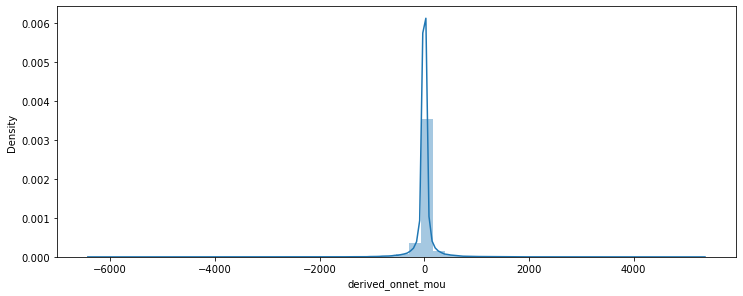

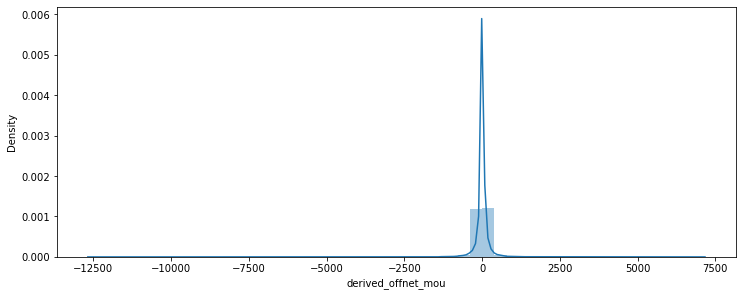

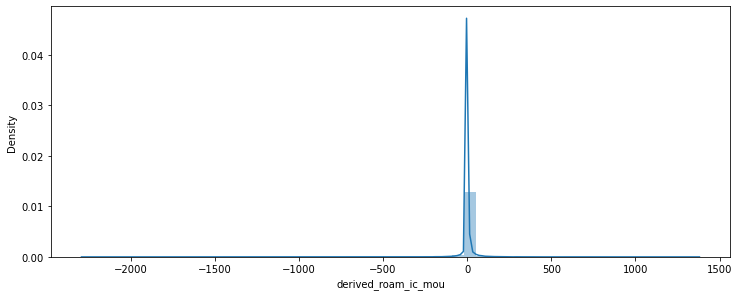

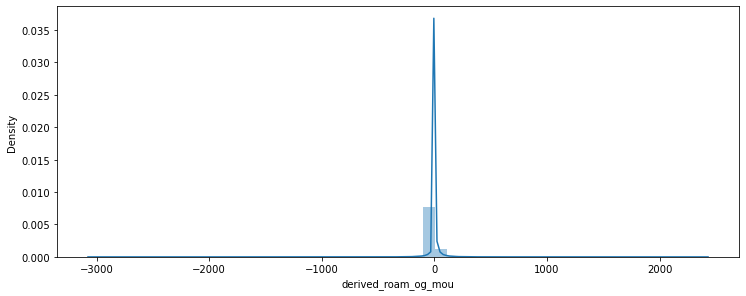

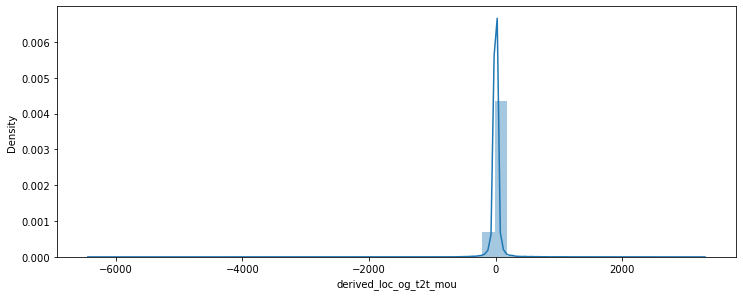

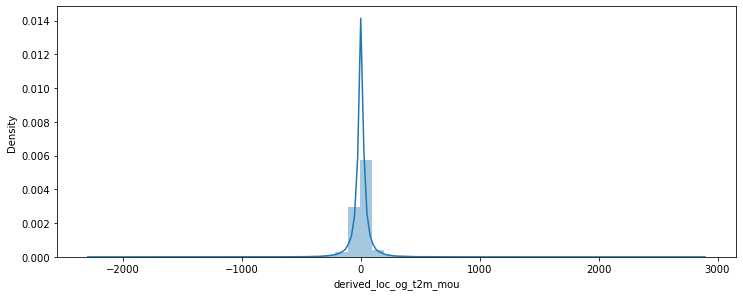

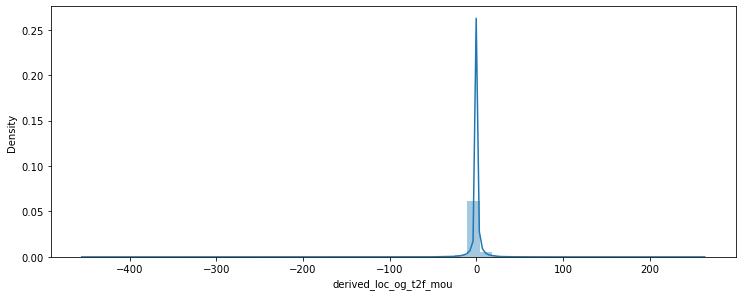

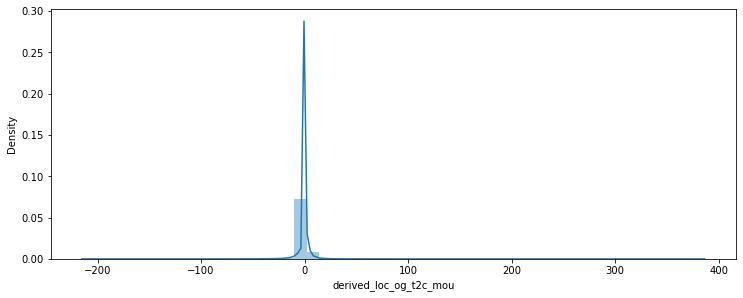

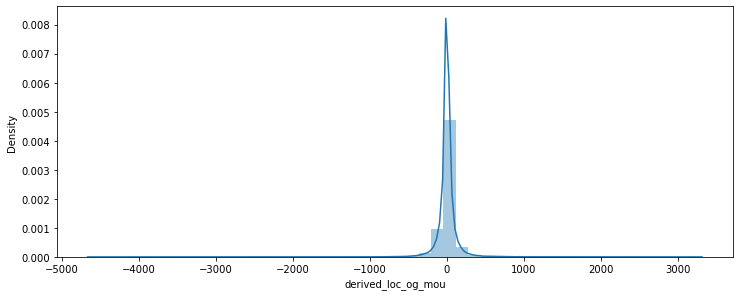

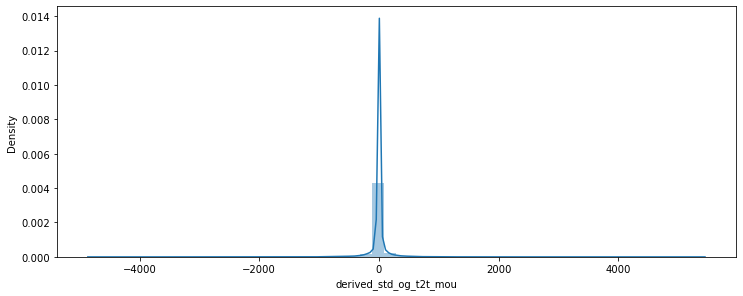

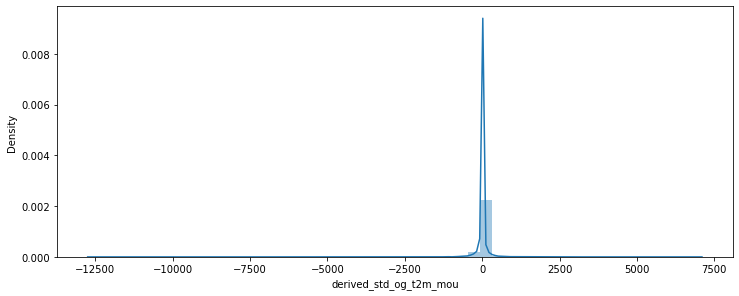

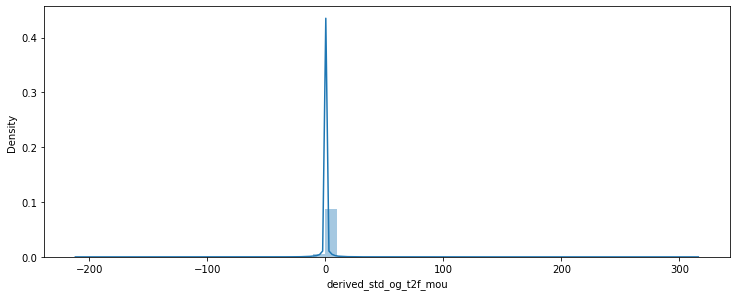

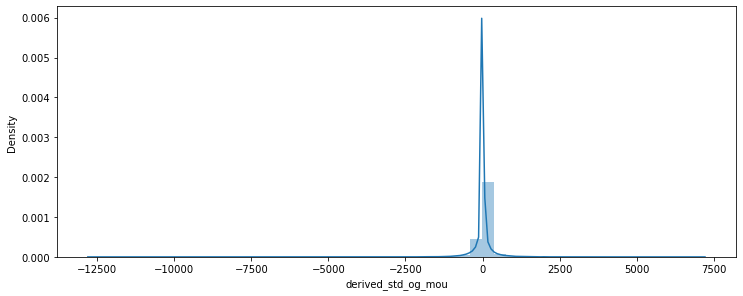

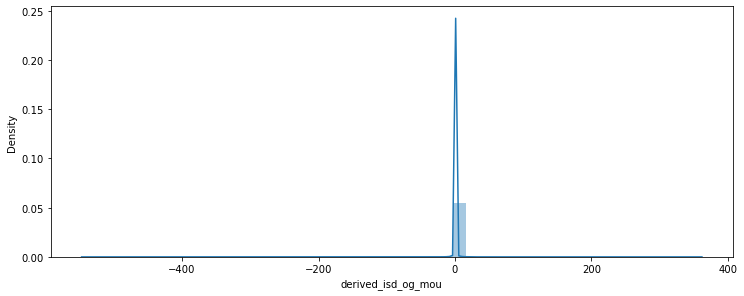

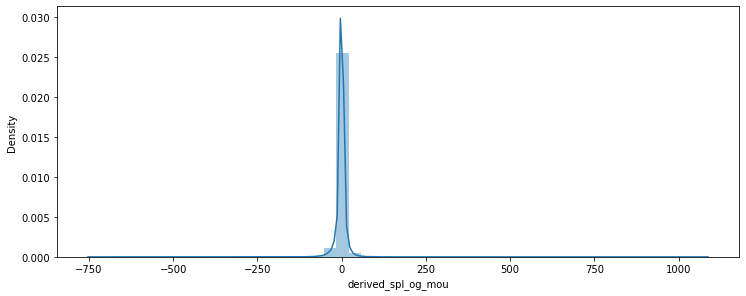

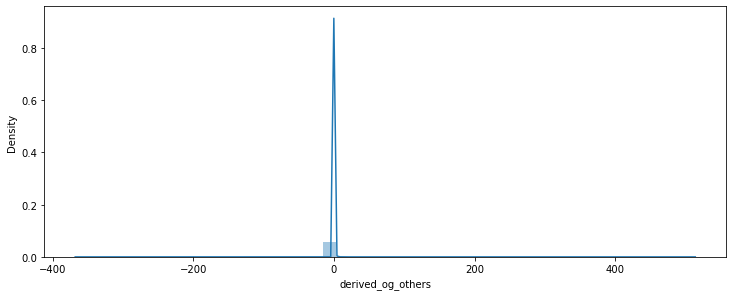

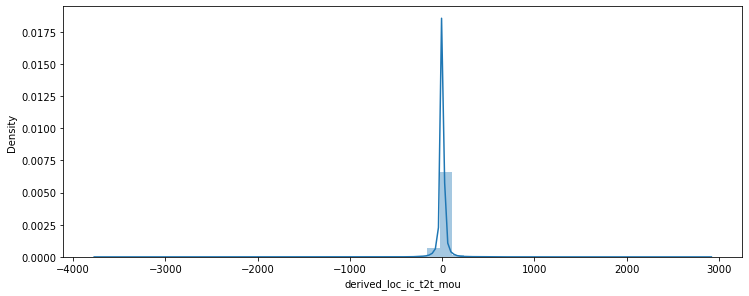

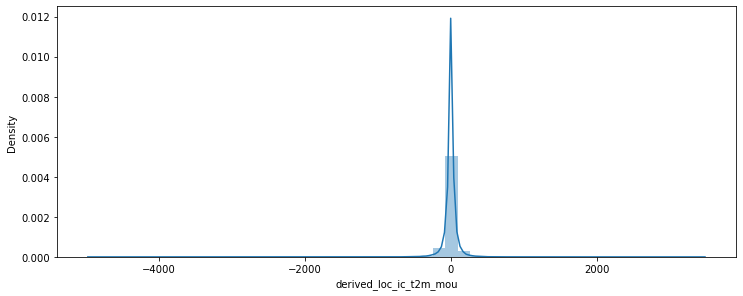

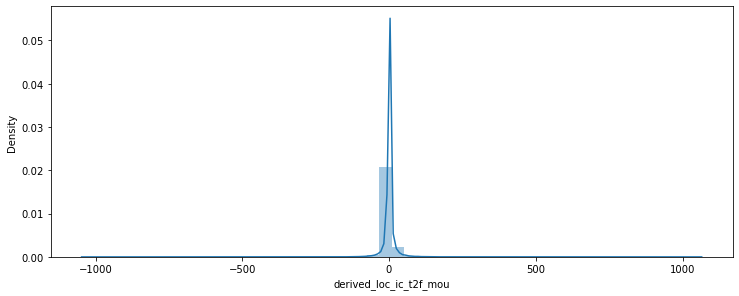

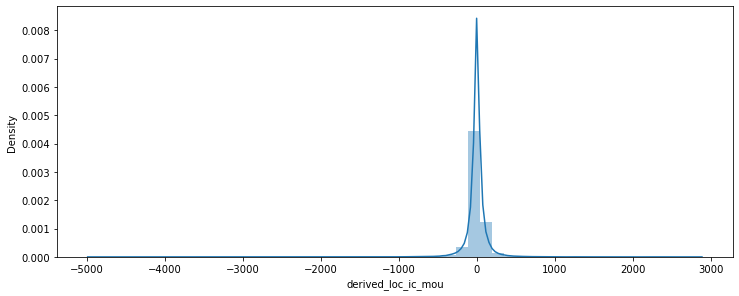

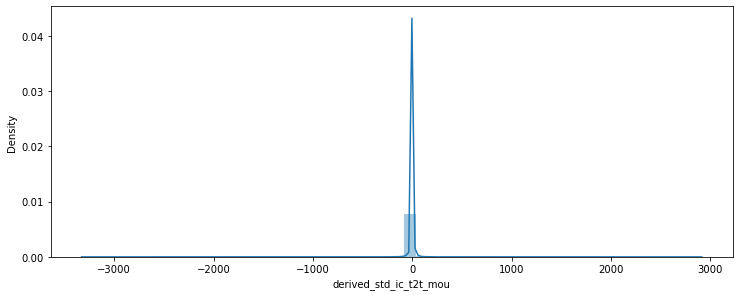

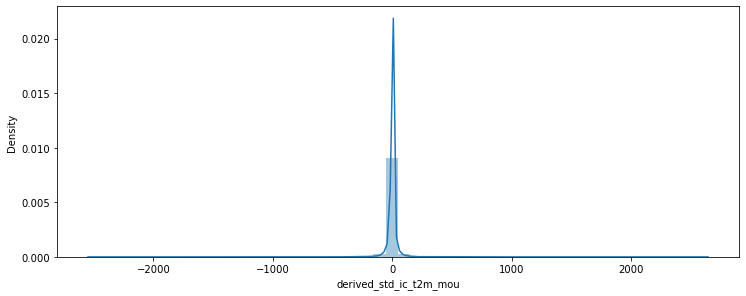

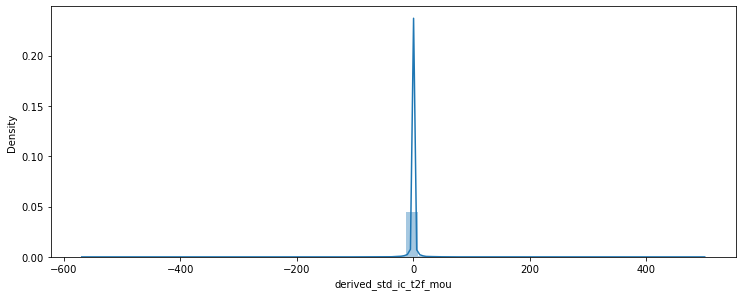

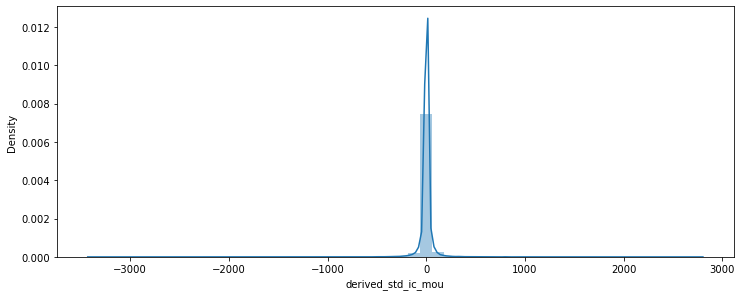

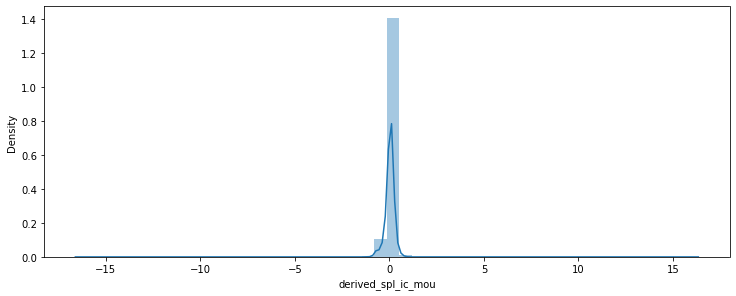

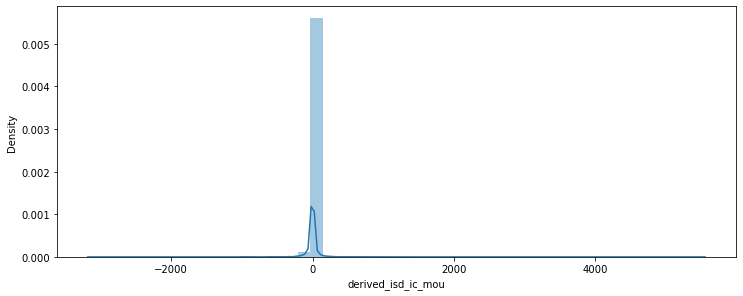

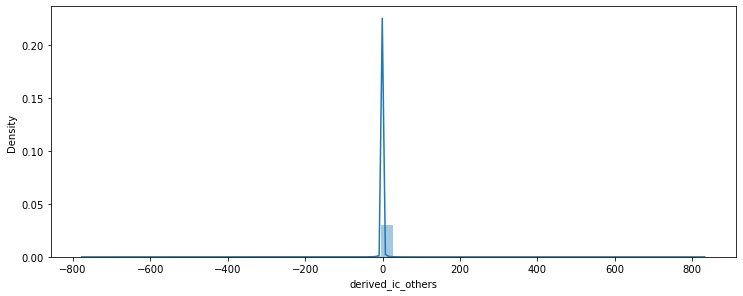

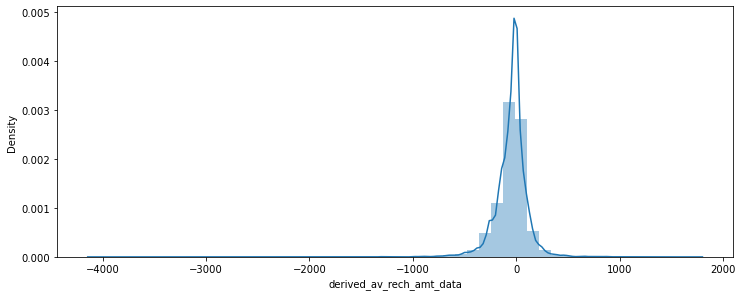

In [59]:
for i in range(len(feat_with_missing_value)):
    generate_distribution_plot([feat_with_missing_value[i]])

Since most of the features are seen to highly skewed imputing 'mode' value in place of missing data.

In [60]:
for feat in feat_with_missing_value:
    telecom[feat] = telecom[feat].fillna(telecom[feat].mode()[0])

In [61]:
# Verifying the features after Missing value Imputation
telecom[feat_with_missing_value].isnull().sum()

derived_onnet_mou           0
derived_offnet_mou          0
derived_roam_ic_mou         0
derived_roam_og_mou         0
derived_loc_og_t2t_mou      0
derived_loc_og_t2m_mou      0
derived_loc_og_t2f_mou      0
derived_loc_og_t2c_mou      0
derived_loc_og_mou          0
derived_std_og_t2t_mou      0
derived_std_og_t2m_mou      0
derived_std_og_t2f_mou      0
derived_std_og_mou          0
derived_isd_og_mou          0
derived_spl_og_mou          0
derived_og_others           0
derived_loc_ic_t2t_mou      0
derived_loc_ic_t2m_mou      0
derived_loc_ic_t2f_mou      0
derived_loc_ic_mou          0
derived_std_ic_t2t_mou      0
derived_std_ic_t2m_mou      0
derived_std_ic_t2f_mou      0
derived_std_ic_mou          0
derived_spl_ic_mou          0
derived_isd_ic_mou          0
derived_ic_others           0
derived_av_rech_amt_data    0
dtype: int64

In [62]:
telecom.shape

(69999, 46)

## Outlier Treatment

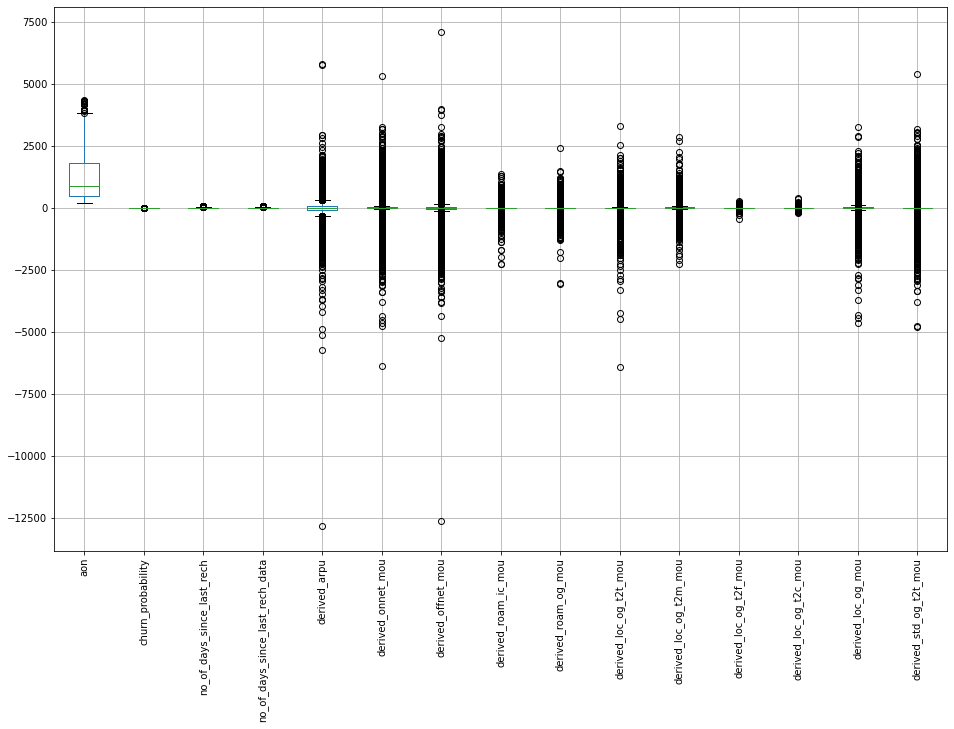

In [63]:
plt.figure(figsize = (16,10)) 
telecom.iloc[:,:15].boxplot()
plt.xticks(rotation=90)
plt.show()

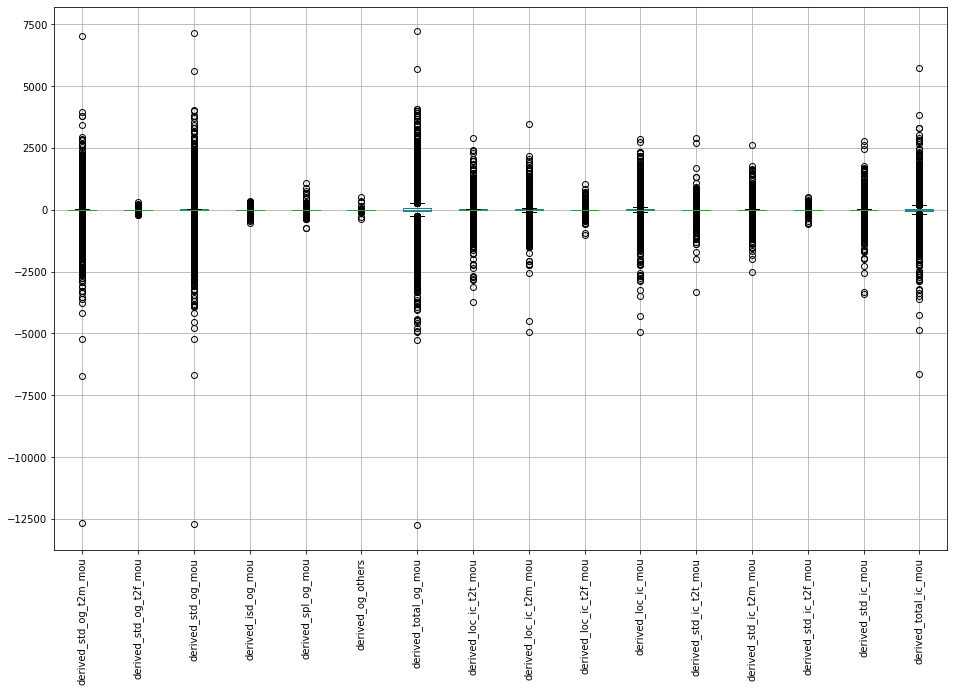

In [64]:
plt.figure(figsize = (16,10)) 
telecom.iloc[:,15:31].boxplot()
plt.xticks(rotation=90)
plt.show()

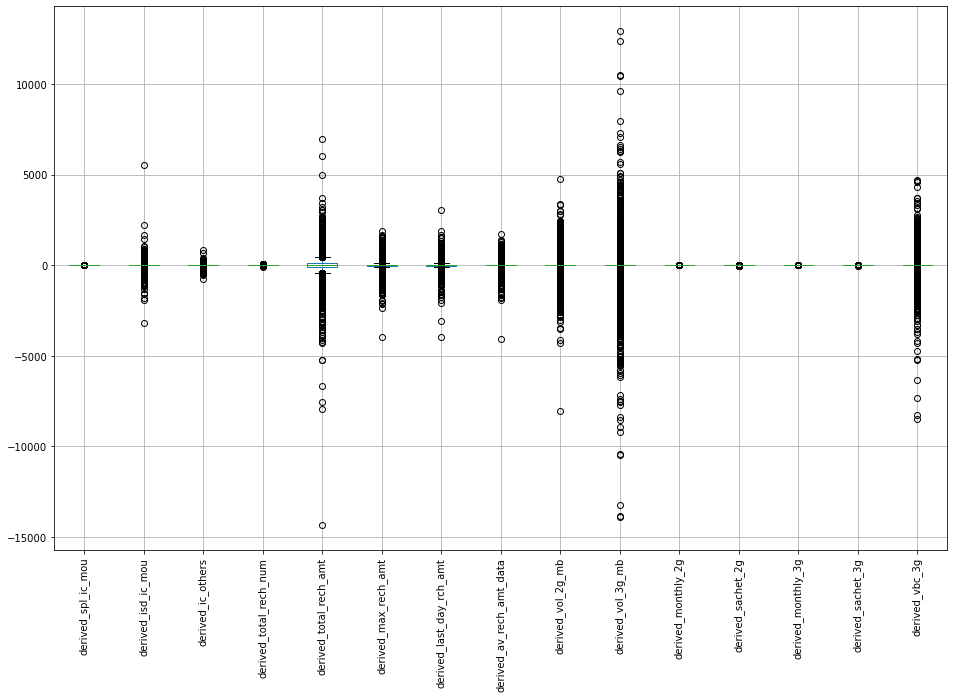

In [65]:
plt.figure(figsize = (16,10)) 
telecom.iloc[:,31:].boxplot()
plt.xticks(rotation=90)
plt.show()

Most of the features have high number of outliers, dropping the outliers will cause loss of information. Hence changing the value more than upper whisker value with upper whisker value and value lower than lower whisker value with lower whisker value.

In [66]:
for x in telecom.drop(['churn_probability'],axis=1).columns: # Excluding target column ie churned
    Q1 = telecom[x].quantile(0.25)
    Q3 = telecom[x].quantile(0.75)
    IQR = Q3 - Q1
    telecom[x].loc[(telecom[x] < (Q1 - 1.5 * IQR))]= Q1 - 1.5 * IQR
    telecom[x].loc[(telecom[x] > (Q3 + 1.5 * IQR))]= Q3 + 1.5 * IQR

## Checking Correlation

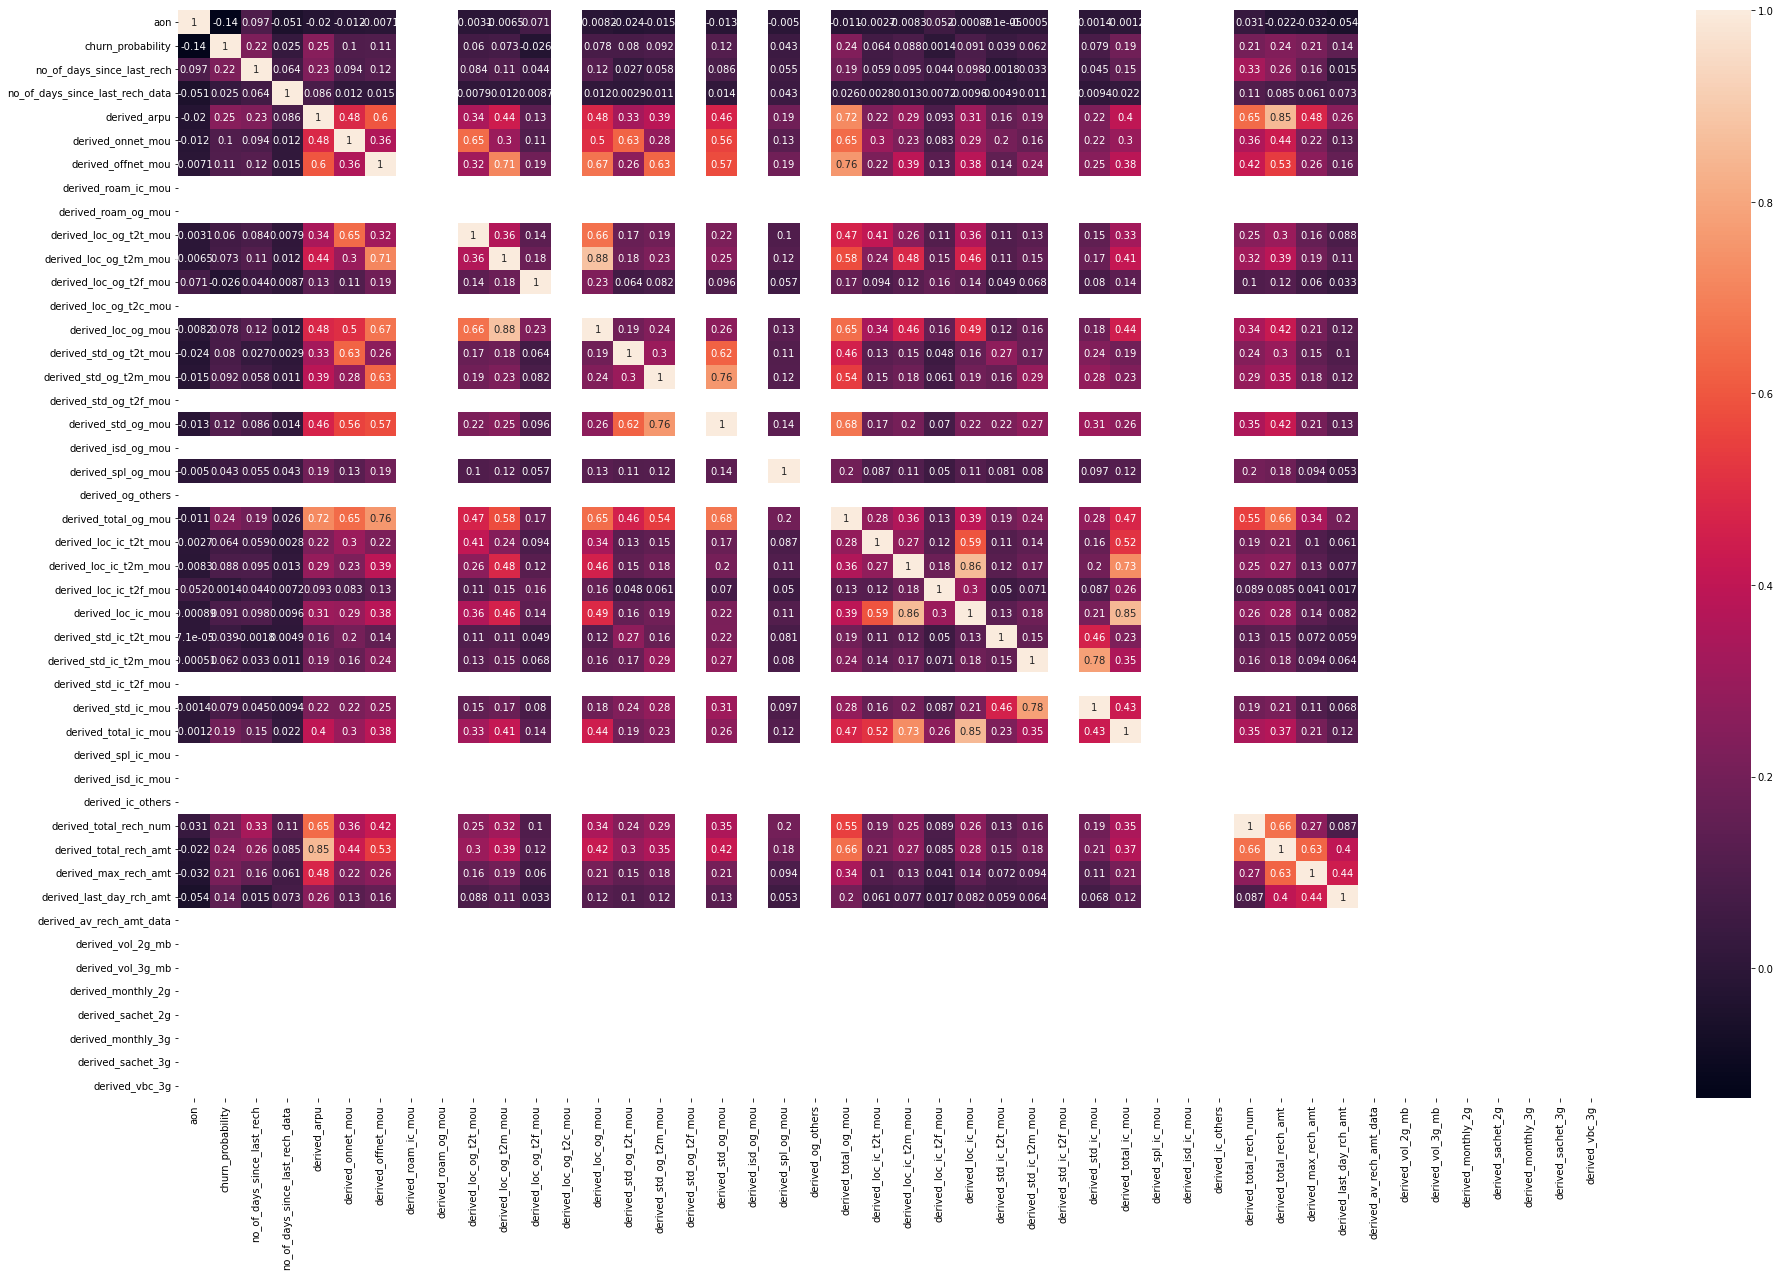

In [67]:
plt.figure(figsize = (32,20))
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [68]:
# After Outlier Treatment some features have no variance
# Identifying features having fixed values in all rows and removing them

skewed= []
for x in telecom.columns:
    if len(telecom[x].value_counts())==1:
        skewed.append(x)
        print(telecom[x].value_counts())
print(skewed)

0.0    69999
Name: derived_roam_ic_mou, dtype: int64
0.0    69999
Name: derived_roam_og_mou, dtype: int64
0.0    69999
Name: derived_loc_og_t2c_mou, dtype: int64
0.0    69999
Name: derived_std_og_t2f_mou, dtype: int64
0.0    69999
Name: derived_isd_og_mou, dtype: int64
0.0    69999
Name: derived_og_others, dtype: int64
0.0    69999
Name: derived_std_ic_t2f_mou, dtype: int64
0.0    69999
Name: derived_spl_ic_mou, dtype: int64
0.0    69999
Name: derived_isd_ic_mou, dtype: int64
0.0    69999
Name: derived_ic_others, dtype: int64
0.0    69999
Name: derived_av_rech_amt_data, dtype: int64
0.0    69999
Name: derived_vol_2g_mb, dtype: int64
0.0    69999
Name: derived_vol_3g_mb, dtype: int64
0.0    69999
Name: derived_monthly_2g, dtype: int64
0.0    69999
Name: derived_sachet_2g, dtype: int64
0.0    69999
Name: derived_monthly_3g, dtype: int64
0.0    69999
Name: derived_sachet_3g, dtype: int64
0.0    69999
Name: derived_vbc_3g, dtype: int64
['derived_roam_ic_mou', 'derived_roam_og_mou', 'derive

In [69]:
telecom.drop(skewed,axis=1,inplace=True)

In [70]:
telecom.shape

(69999, 28)

## Bivariate and Multivariate Analysis

In [71]:
telecom.columns

Index(['aon', 'churn_probability', 'no_of_days_since_last_rech',
       'no_of_days_since_last_rech_data', 'derived_arpu', 'derived_onnet_mou',
       'derived_offnet_mou', 'derived_loc_og_t2t_mou',
       'derived_loc_og_t2m_mou', 'derived_loc_og_t2f_mou',
       'derived_loc_og_mou', 'derived_std_og_t2t_mou',
       'derived_std_og_t2m_mou', 'derived_std_og_mou', 'derived_spl_og_mou',
       'derived_total_og_mou', 'derived_loc_ic_t2t_mou',
       'derived_loc_ic_t2m_mou', 'derived_loc_ic_t2f_mou',
       'derived_loc_ic_mou', 'derived_std_ic_t2t_mou',
       'derived_std_ic_t2m_mou', 'derived_std_ic_mou', 'derived_total_ic_mou',
       'derived_total_rech_num', 'derived_total_rech_amt',
       'derived_max_rech_amt', 'derived_last_day_rch_amt'],
      dtype='object')

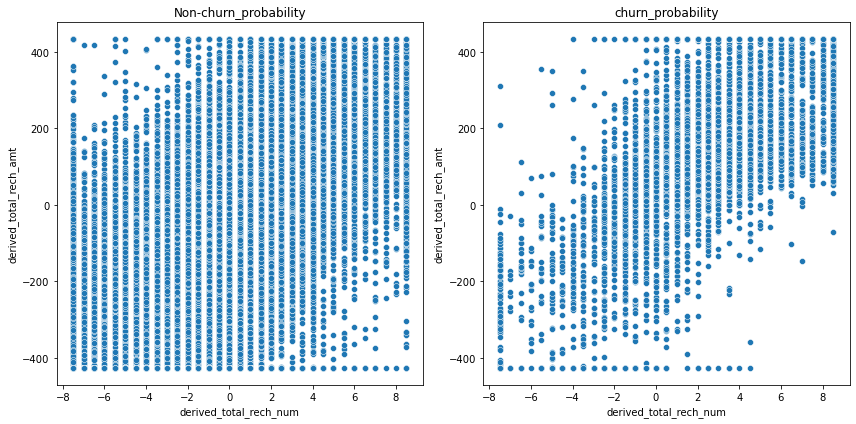

In [72]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-churn_probability")
ax2 = fig.add_subplot(1, 2, 2, title="churn_probability")

sns.scatterplot(telecom[telecom["churn_probability"] == 0]['derived_total_rech_num'], telecom[telecom["churn_probability"] == 0]['derived_total_rech_amt'], ax=ax1)
sns.scatterplot(telecom[telecom["churn_probability"] == 1]['derived_total_rech_num'], telecom[telecom["churn_probability"] == 1]['derived_total_rech_amt'], ax=ax2)

plt.tight_layout()
plt.show()

**Observation:**

- There is a positive correlation between total recharge amount and total number of recharges.
- 'derived_total_rech_amt' is derived by taking average of total recharge done in good phase (i.e. month 6 and 7) and deducting recharge of action phase (month 8) from it. 
- A positive value of this feature means, recharge amount value dropped from good phase to action phase. The same applies for 'derived_total_rech_num' as well.
- A negative value of this feature means, recharge amount value increased from good phase to action phase. The same applies for 'derived_total_rech_num' as well.
- By comparing churned and non-churned customer we can see that, for churned customers both recharge number and recharge amount have dropped in action phase. Also we can see that negative value has been decreased for churned customer.


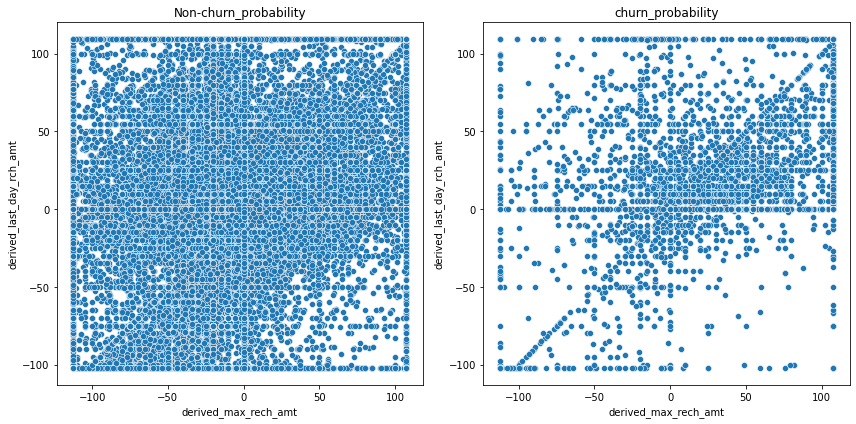

In [73]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-churn_probability")
ax2 = fig.add_subplot(1, 2, 2, title="churn_probability")

sns.scatterplot(telecom[telecom["churn_probability"] == 0]['derived_max_rech_amt'], telecom[telecom["churn_probability"] == 0]['derived_last_day_rch_amt'], ax=ax1)
sns.scatterplot(telecom[telecom["churn_probability"] == 1]['derived_max_rech_amt'], telecom[telecom["churn_probability"] == 1]['derived_last_day_rch_amt'], ax=ax2)

plt.tight_layout()
plt.show()

**Observation:**

- derived_max_rech_amt and derive_last_day_rch_amt are most likely to be positive for churned customers. This means, drop in maximum recharge amount and last day recharge amount in action phase can signify customer churn.

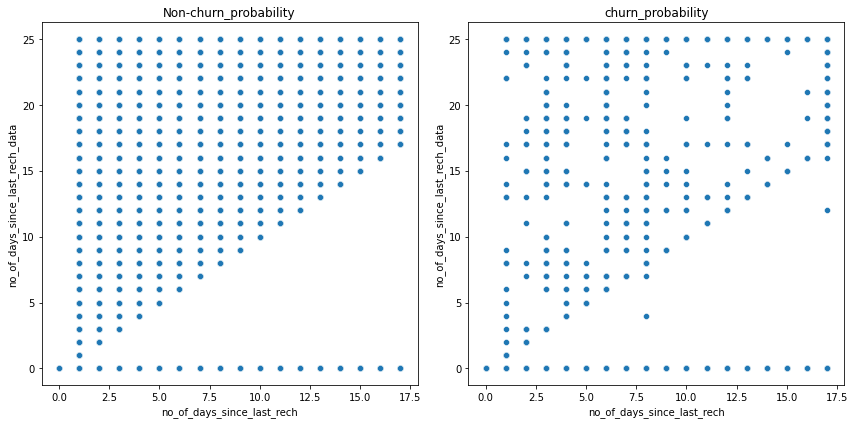

In [74]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-churn_probability")
ax2 = fig.add_subplot(1, 2, 2, title="churn_probability")

sns.scatterplot(telecom[telecom["churn_probability"] == 0]['no_of_days_since_last_rech'], telecom[telecom["churn_probability"] == 0]['no_of_days_since_last_rech_data'], ax=ax1)
sns.scatterplot(telecom[telecom["churn_probability"] == 1]['no_of_days_since_last_rech'], telecom[telecom["churn_probability"] == 1]['no_of_days_since_last_rech_data'], ax=ax2)

plt.tight_layout()
plt.show()

In [75]:
print("Non-churned Customers")
print(telecom[telecom["churn_probability"] == 0]['no_of_days_since_last_rech'].value_counts(normalize=True))
#print(telecom[telecom["churned"] == 0]['no_of_days_since_last_rech_data'].value_counts(normalize=True))

print("Churned Customers")
print(telecom[telecom["churn_probability"] == 1]['no_of_days_since_last_rech'].value_counts(normalize=True))
#print(telecom[telecom["churned"] == 1]['no_of_days_since_last_rech_data'].value_counts(normalize=True))

Non-churned Customers
1.0     0.161754
2.0     0.127587
3.0     0.102645
4.0     0.098191
17.0    0.096855
6.0     0.088250
7.0     0.077895
8.0     0.074681
5.0     0.061590
9.0     0.019056
10.0    0.018833
12.0    0.018770
11.0    0.014077
13.0    0.013855
14.0    0.010689
16.0    0.007985
15.0    0.007222
0.0     0.000064
Name: no_of_days_since_last_rech, dtype: float64
Churned Customers
17.0    0.315339
6.0     0.136988
8.0     0.095345
4.0     0.093943
7.0     0.080202
3.0     0.075996
13.0    0.034072
10.0    0.033231
12.0    0.025379
2.0     0.023275
1.0     0.021733
5.0     0.019630
9.0     0.008974
0.0     0.008553
14.0    0.007712
11.0    0.007151
15.0    0.006590
16.0    0.005889
Name: no_of_days_since_last_rech, dtype: float64


**Observation:**

- The above 2 features are extracted by counting the number of days between last recharge date available (in June, July or August) and 1st September of the same year.

- By comparing Churned and non-churned customers, customers who have not recharged in 17 days or more are highly likely to churn. About 32 % of the churne customers did their last recharge 17 days ago. On the other hand, 9.7% of the non-churned customers did their last recharge 17 days ago (from reference date of 1st September).

- Number of days since last recharge is likely to be low for non-churned customer.

Checking for correlation between minute of usage of std and local calls for customers and comparing between churned `and non-churned customers
Checking if there is any visible trend in recharge amount for the churned customers.

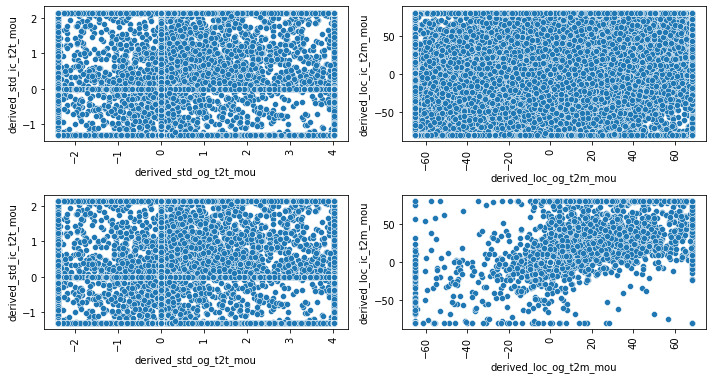

In [76]:
feature_pair = [['derived_std_og_t2t_mou','derived_std_ic_t2t_mou'], ['derived_loc_og_t2m_mou', 'derived_loc_ic_t2m_mou']]

fig=plt.subplots(figsize=(10, 10))

for i, feats in enumerate(feature_pair+feature_pair):
    if i < 3:
        churned=0 # first row for non-churned
    else:
        churned=1 # second row for churned
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.scatterplot(x=telecom[telecom["churn_probability"] == churned][feats[0]],
                    y=telecom[telecom["churn_probability"] == churned][feats[1]])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Observation:**
- There is no conclusive trend visible for churned and non-churned customers for the above features.

# Model Building

- Finding optimum number of principal components
- Build Logistic Regression model with optimum cutoff and calculate performance metrics
- Build Decision Tree model with best parameters and calculate performance metrics
- Build Random Forest Classifier model with best parameters and calculate performance metrics
- Build XGBoost Classifier model with best parameters and calculate performance metrics
- Compare performance metrices to build final model

## Splitting Data into Training and Test set

In [77]:
X = telecom.drop(['churn_probability'], axis=1)
y = telecom[['churn_probability']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=101)

In [78]:
telecom.shape

(69999, 28)

In [79]:
print("shape of X_train ", X_train.shape)
print("shape of X_test ", X_test.shape)
print("shape of y_train ", y_train.shape)
print("shape of y_test ", y_test.shape)

shape of X_train  (6999, 27)
shape of X_test  (63000, 27)
shape of y_train  (6999, 1)
shape of y_test  (63000, 1)


## Feature Scaling

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Imbalance Treatment

In [81]:
y_train['churn_probability'].value_counts()

0    6309
1     690
Name: churn_probability, dtype: int64

We have data imbalance as 90% data is non churning and 10% is churn data. We need to do oversampling of data for data balance

In [82]:
print("Before Data Imbalance Treatment: ")
print("X train scaled shape : ", X_train_scaled.shape)
print("y train shape : ", y_train.shape)
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled,y_train)
print("After Data Imbalance Treatment: ")
print("X train shape : ", X_train_smote.shape)
print("y train shape : ", y_train_smote.shape)

Before Data Imbalance Treatment: 
X train scaled shape :  (6999, 27)
y train shape :  (6999, 1)
After Data Imbalance Treatment: 
X train shape :  (12618, 27)
y train shape :  (12618, 1)


- For building predictor model (where predicting churn is more important than model interpreatability), dimensionality reduction technique PCA will be applied on Independent variables.
- For identifying most significant driving factors of churn, X_train_scaled will be used.

## Applying PCA and Building Predictor Model

In [83]:
def evaluate_model(y_true, y_pred):
    confusion = metrics.confusion_matrix(y_true, y_pred)
    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 

    accuracy_sc = metrics.accuracy_score(y_true, y_pred)
    sensitivity_score = TP / float(TP+FN)
    return accuracy_sc, sensitivity_score

## Logistic Regression

Using Logistic Regression Model as the base model. 

- Performing PCA for component numbers 10,13,15,18,20,25,27
- Peforming Logistic Regression with different number features and different number of cutoffs 0.2,0.3,0.4,0.5,0.6,0.7,0.8
- Storing the acuracy score and sensitivity scores of the models on test data in 2 different dataframes.
- This will help in finding out optimim number of features (for PCA) and cut off value (for Logistic Regression)

In [84]:
accuracy_test_data = pd.DataFrame(data=np.zeros((7,7)),index=[0.2,0.3,0.4,0.5,0.6,0.7,0.8], columns=[10,13,15,18,20,25,27])
sensitivity_test_data = pd.DataFrame(data=np.zeros((7,7)),index=[0.2,0.3,0.4,0.5,0.6,0.7,0.8], columns=[10,13,15,18,20,25,27])

In [85]:
for n in [10,13,15,18,20,25]:
    pca = IncrementalPCA(n_components=n)    
    X_train_pca = pca.fit_transform(X_train_smote) # training data is scaled and treated for data imbalance
    X_test_pca = pca.transform(X_test_scaled)      # test data is only scaled
      
    X_train_sm = sm.add_constant(X_train_pca)
    X_test_sm = sm.add_constant(X_test_pca)
    logm2 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()

    #y_train_pred = res.predict(X_train_sm)
    y_test_pred = res.predict(X_test_sm)

    df = pd.DataFrame()
    df['true_value'] = y_test.values.reshape(-1)
    df['pred_prob_value'] = y_test_pred.reshape(-1) # predicted probability of churned

    for cutoff in [float(x)/10 for x in range(2, 9)]:
        col_name = 'pred_value' + str(cutoff)
        df[col_name] = df['pred_prob_value'].map(lambda x: 1 if x > cutoff else 0)
        accuracy_test_data.loc[cutoff, n], sensitivity_test_data.loc[cutoff, n] = evaluate_model(y_test, df[col_name])

In [86]:
df.head()

,true_value,pred_prob_value,pred_value0.2,pred_value0.3,pred_value0.4,pred_value0.5,pred_value0.6,pred_value0.7,pred_value0.8
0,0,0.399265,1,1,0,0,0,0,0
1,0,0.610754,1,1,1,1,1,0,0
2,0,0.289395,1,0,0,0,0,0,0
3,0,0.237432,1,0,0,0,0,0,0
4,0,0.050846,0,0,0,0,0,0,0


In [87]:
sensitivity_test_data

,10,13,15,18,20,25,27
0.2,0.936666,0.931698,0.937907,0.936666,0.936355,0.933406,0.0
0.3,0.881248,0.880006,0.883421,0.887302,0.885439,0.879230,0.0
0.4,0.814499,0.813412,0.825210,0.826451,0.825675,0.824589,0.0
0.5,0.736262,0.730674,0.754269,0.751319,0.751009,0.751475,0.0
0.6,0.634896,0.639863,0.651816,0.655542,0.657715,0.659888,0.0
0.7,0.480751,0.500931,0.523440,0.529804,0.540050,0.543775,0.0
0.8,0.282210,0.311549,0.364949,0.376902,0.393201,0.403291,0.0


In [88]:
accuracy_test_data

,10,13,15,18,20,25,27
0.2,0.353079,0.369968,0.414968,0.417698,0.423603,0.426524,0.0
0.3,0.501175,0.511302,0.547222,0.547762,0.553016,0.557825,0.0
0.4,0.624238,0.632571,0.656984,0.657063,0.661746,0.668524,0.0
0.5,0.726317,0.729667,0.742714,0.743333,0.747873,0.754952,0.0
0.6,0.806365,0.809190,0.810762,0.811397,0.817524,0.822714,0.0
0.7,0.859444,0.862286,0.857841,0.858444,0.864000,0.867143,0.0
0.8,0.889540,0.892222,0.887079,0.889540,0.894000,0.895556,0.0


After inspecting accuracy score and sensitivity score for different number of principal components and cut off , taking 15 components and cutoff=0.5

In [89]:
pca = IncrementalPCA(n_components=15)    
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_scaled)

In [90]:
evaluation_df = pd.DataFrame(data=np.zeros((4,2)), index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'], columns=['Accuracy', 'Sensitivity'])
evaluation_df.loc['Logistic Regression', 'Accuracy'] = round(accuracy_test_data.loc[0.5, 15], 3)
evaluation_df.loc['Logistic Regression', 'Sensitivity'] = round(sensitivity_test_data.loc[0.5, 15],3)
evaluation_df

,Accuracy,Sensitivity
Logistic Regression,0.743,0.754
Decision Tree,0.000,0.000
Random Forest,0.000,0.000
XGBoost,0.000,0.000


- Since the main objective is to predict as accurate model as possible, we will be focusing on accuracy for model evaluation.
- With GridSearchCV finding tuning the hyperparameters and obtaining the best estimator

## Decision Tree

In [91]:
dt = DecisionTreeClassifier(random_state=101)
params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 20, 50, 100],
    'criterion': ["entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_train_pca, y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 20, 50, 100]},
             scoring='recall', verbose=1)

In [92]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

In [93]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

In [94]:
dt_best = grid_search.best_estimator_
dt_best.fit(X_train_pca, y_train_smote)
y_train_pred_dt = dt_best.predict(X_train_pca)
y_test_pred_dt = dt_best.predict(X_test_pca)
print(y_test_pred_dt)

[0 0 0 ... 0 0 0]


In [95]:
print("Performance of Decision Tree Classifier on training data")
accuracy_sc, sensitivity_score = evaluate_model(y_train_smote, y_train_pred_dt)
print("Accuracy : ", accuracy_sc)
print("Sensitivity : ", sensitivity_score)

print("Performance of Decision Tree Classifier on test data")
accuracy_sc, sensitivity_score = evaluate_model(y_test, y_test_pred_dt)
evaluation_df.loc['Decision Tree', 'Accuracy'] = accuracy_sc
evaluation_df.loc['Decision Tree', 'Sensitivity'] = sensitivity_score
evaluation_df

Performance of Decision Tree Classifier on training data
Accuracy :  0.9027579648121731
Sensitivity :  0.969408781106356
Performance of Decision Tree Classifier on test data


,Accuracy,Sensitivity
Logistic Regression,0.743000,0.754000
Decision Tree,0.789937,0.730984
Random Forest,0.000000,0.000000
XGBoost,0.000000,0.000000


## Random Forest

In [96]:
classifier_rf = RandomForestClassifier(random_state=101, n_jobs=-1)

params = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [5, 20, 50],
    'max_features': [3, 4, 5],
    'n_estimators': [50, 100]
}

grid_search_1 = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "recall")

grid_search_1.fit(X_train_pca,y_train_smote)
rf_best = grid_search_1.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [97]:
grid_search_1.best_params_

{'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 50}

In [98]:
rf_best.fit(X_train_pca, y_train_smote)
y_train_pred_rf = rf_best.predict(X_train_pca)
y_test_pred_rf = rf_best.predict(X_test_pca)
print(y_test_pred_rf)

[0 0 0 ... 0 0 0]


In [99]:
print("Performance of Random Forest Classifier on training data")
accuracy_sc, sensitivity_score = evaluate_model(y_train_smote, y_train_pred_rf)
print("Accuracy : ", accuracy_sc)
print("Sensitivity : ", sensitivity_score)

print("Performance of Random Forest Classifier on test data")
accuracy_sc,sensitivity_score = evaluate_model(y_test, y_test_pred_rf)
evaluation_df.loc['Random Forest', 'Accuracy'] = round(accuracy_sc, 5)
evaluation_df.loc['Random Forest', 'Sensitivity'] = round(sensitivity_score, 5)
evaluation_df.iloc[:, :]

Performance of Random Forest Classifier on training data
Accuracy :  0.9808210492946584
Sensitivity :  0.9882707243620225
Performance of Random Forest Classifier on test data


,Accuracy,Sensitivity
Logistic Regression,0.743000,0.754000
Decision Tree,0.789937,0.730984
Random Forest,0.907130,0.632570
XGBoost,0.000000,0.000000


Both Decision and Random Forest classifier models performing better on test data for accuracy. We are focusing on models performance on test data for choosing the final model, as the final model should be good at generalizing the underlying trend in data.

## XGBoost

In [100]:
clf_xgb = xgb.XGBClassifier(learning_rate=0.2, max_depth = 10, n_estimators = 500, n_jobs=-1)
clf_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [101]:
clf_xgb.fit(X_train_pca, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [102]:
y_train_pred_xgb = clf_xgb.predict(X_train_pca)
y_test_pred_xgb = clf_xgb.predict(X_test_pca)
print(y_test_pred_xgb)

[0 0 0 ... 0 0 0]


In [103]:
print("Performance of XGBoost Classifier on training data")
accuracy_sc, sensitivity_score = evaluate_model(y_train_smote, y_train_pred_xgb)
print("Accuracy : ", accuracy_sc)
print("Sensitivity : ", sensitivity_score)

print("Performance of XGBoost Classifier on test data")
accuracy_sc, sensitivity_score = evaluate_model(y_test, y_test_pred_xgb)
evaluation_df.loc['XGBoost', 'Accuracy'] = round(accuracy_sc, 5)
evaluation_df.loc['XGBoost', 'Sensitivity'] = round(sensitivity_score, 5)
evaluation_df

Performance of XGBoost Classifier on training data
Accuracy :  1.0
Sensitivity :  1.0
Performance of XGBoost Classifier on test data


,Accuracy,Sensitivity
Logistic Regression,0.743000,0.754000
Decision Tree,0.789937,0.730984
Random Forest,0.907130,0.632570
XGBoost,0.908300,0.600900


- After comparing the accuracy and sentivity score on test data of different models like Logistic Regression, Decision Tree Classifier, Random Forest Classifier and XGBoost, it is observed that,

- **Decision Tree has highest sensitivity score.**

- **XGBoost has highest accuracy score.**

We have to get high accuracy on test data for submission on kaggle. So, in this particular scenario, we will use XGBoost.

# Building Final Predictor Model using XGBoost for submission on Kaggle

In [104]:
clf_xgb.fit(X_train_pca, y_train_smote)
y_train_pred_xgb = clf_xgb.predict(X_train_pca)
y_test_pred_xgb = clf_xgb.predict(X_test_pca)
print(y_test_pred_xgb)

print("Performance of XGBoost Classifier on training data")
accuracy_sc, sensitivity_score = evaluate_model(y_train_smote, y_train_pred_xgb)
print("Accuracy : ", accuracy_sc)
print("Sensitivity : ", sensitivity_score)

print("Performance of XGBoost Classifier on test data")
accuracy_sc, sensitivity_score = evaluate_model(y_test, y_test_pred_xgb)
evaluation_df.loc['XGBoost', 'Accuracy'] = round(accuracy_sc, 5)
evaluation_df.loc['XGBoost', 'Sensitivity'] = round(sensitivity_score, 5)
evaluation_df

[0 0 0 ... 0 0 0]
Performance of XGBoost Classifier on training data
Accuracy :  1.0
Sensitivity :  1.0
Performance of XGBoost Classifier on test data


,Accuracy,Sensitivity
Logistic Regression,0.743000,0.754000
Decision Tree,0.789937,0.730984
Random Forest,0.907130,0.632570
XGBoost,0.908300,0.600900


By inspecting performance metrics of XGBoost model for different parameters values , we are selecting 'max_depth': 10, learning_rate=0.2, max_depth = 10, and n_estimators = 500' as the parameter for final model as it has accuracy score of 0.91 and sensitivity score of 0.60 on test data


- **Final Predictor Model = XGBoost**
- **learning_rate=0.2, max_depth = 10, n_estimators = 500**

## Run model on Test file and create submission file for Kaggle competition

In [105]:
telecom_test = pd.read_csv("test (1).csv")
telecom_test.shape

(30000, 171)

In [106]:
telecom_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [107]:
# Setting id as index as it is a unique identifier for a customer
telecom_test = telecom_test.set_index('id')

In [108]:
telecom_test.shape

(30000, 170)

In [109]:
skewed = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
          'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6',
          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [110]:
telecom_test.drop(skewed,axis=1,inplace=True)

In [111]:
telecom_test.shape

(30000, 157)

In [112]:
# Taking recharge date related features into a new dataframe for deriving new features

rech_df = telecom_test[['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8',
                   'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']]

In [113]:
for feat in rech_df.columns:
    print(feat, rech_df[feat].isnull().sum())

date_of_last_rech_data_6 22415
date_of_last_rech_data_7 22294
date_of_last_rech_data_8 22078
date_of_last_rech_6 506
date_of_last_rech_7 533
date_of_last_rech_8 1161


In [114]:
# Converting strings to datetime object for convenience
import datetime
for feat in rech_df.columns:
    rech_df[feat] = pd.to_datetime(rech_df[feat])

In [115]:
rech_df['date_of_last_rech_data'] = rech_df['date_of_last_rech_data_8']
rech_df['date_of_last_rech'] = rech_df['date_of_last_rech_8']

In [116]:
for i in range(rech_df.shape[0]):
    # if last data recharge date not in month=8, then check month 7 and 6
    if pd.isnull(rech_df.iloc[i,2]): 
        if pd.isnull(rech_df.iloc[i,1]):
            rech_df.iloc[i,6] = rech_df.iloc[i,0] 
        else:
            rech_df.iloc[i,6] = rech_df.iloc[i,1]
    # if last normal recharge date not in month=8, then check month 7 and 6
    if pd.isnull(rech_df.iloc[i,5]): 
        if pd.isnull(rech_df.iloc[i,4]): 
            rech_df.iloc[i,7] = rech_df.iloc[i,3] 
        else:
            rech_df.iloc[i,7] = rech_df.iloc[i,4]

In [117]:
# Taking 1st September as a reference date to count the number of days
# since last recharge
rech_df['ref_date'] = datetime.date(2014, 9, 1)
rech_df['ref_date'] = pd.to_datetime(rech_df['ref_date'])
# for data recharge
rech_df['no_of_days_since_last_rech_data'] = rech_df['ref_date'] - rech_df['date_of_last_rech_data']
rech_df['no_of_days_since_last_rech_data'] = rech_df['no_of_days_since_last_rech_data'].astype('timedelta64[D]')
# for recharge
rech_df['no_of_days_since_last_rech'] = rech_df['ref_date'] - rech_df['date_of_last_rech']
rech_df['no_of_days_since_last_rech'] = rech_df['no_of_days_since_last_rech'].astype('timedelta64[D]')

In [118]:
rech_df[['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].isnull().sum()

no_of_days_since_last_rech            34
no_of_days_since_last_rech_data    18738
dtype: int64

In [119]:
#telecom.av_rech_amt_data_7=telecom.av_rech_amt_data_7.fillna(0)
#telecom.av_rech_amt_data_6=telecom.av_rech_amt_data_6.fillna(0)
rech_df[['no_of_days_since_last_rech_data']] = rech_df[['no_of_days_since_last_rech_data']].fillna(0)
rech_df[['no_of_days_since_last_rech']] = rech_df[['no_of_days_since_last_rech']].fillna(0)

In [120]:
rech_df[['date_of_last_rech', 'date_of_last_rech_data']].isnull().sum()

date_of_last_rech            34
date_of_last_rech_data    18738
dtype: int64

In [121]:
telecom_test['no_of_days_since_last_rech'] = rech_df['no_of_days_since_last_rech']
telecom_test['no_of_days_since_last_rech_data'] = rech_df['no_of_days_since_last_rech_data']

In [122]:
telecom_test.shape

(30000, 159)

In [123]:
telecom_test.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8',
                           'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

In [124]:
telecom_test.shape

(30000, 153)

In [125]:
# Checking common features given for 6th and 7th month 
print(telecom_test.columns[telecom_test.columns.str.contains("6", case=False)])
print(telecom_test.columns[telecom_test.columns.str.contains("7", case=False)])
print(telecom_test.columns[telecom_test.columns.str.contains("8", case=False)])

print(len(telecom_test.columns[telecom_test.columns.str.contains("6", case=False)]))
print(len(telecom_test.columns[telecom_test.columns.str.contains("7", case=False)]))
print(len(telecom_test.columns[telecom_test.columns.str.contains("8", case=False)]))

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6',
       'sachet_3g_6', 'fb_user_6'],
      dtype='object')
Index(['arpu

In [126]:
# Taking the features common in 6th, 7th and 8th month

features = zip(telecom_test.columns[telecom_test.columns.str.contains("6", case=False)],
               telecom_test.columns[telecom_test.columns.str.contains("7", case=False)],
               telecom_test.columns[telecom_test.columns.str.contains("8", case=False)])

In [127]:
monthly_features = list(features)

In [128]:
for i in range(len(monthly_features)):
    feat_6 = monthly_features[i][0]
    feat_7 = monthly_features[i][1]
    feat_8 = monthly_features[i][2]
  
    new_feat_name = 'derived_' + feat_6[:-2]
    telecom_test[new_feat_name]=((telecom_test[feat_6]+telecom_test[feat_7])/2)- telecom_test[feat_8]

    # Dropping the individual month features are deriving new features
    telecom_test.drop([feat_6, feat_7, feat_8], axis=1, inplace=True)

In [129]:
telecom_test.shape

(30000, 55)

In [130]:
# Finding the average of 'jun_vbc_3g' and 'jul_vbc_3g' then subtract it from 'aug_vbc_3g' to get new derived feature
telecom_test['derived_vbc_3g'] = ((telecom_test['jun_vbc_3g'] + telecom_test['jul_vbc_3g'])/2) - telecom_test['aug_vbc_3g']

In [131]:
# Dropping the redundant features 
telecom_test.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'], axis=1, inplace=True)

In [132]:
telecom_test.shape

(30000, 53)

In [133]:
feat_with_high_missing_value = ['derived_total_rech_data', 'derived_max_rech_data', 'derived_count_rech_2g',
                                'derived_count_rech_3g', 'derived_arpu_3g', 'derived_arpu_2g', 'derived_night_pck_user',
                                'derived_fb_user']

In [134]:
telecom_test.drop(feat_with_high_missing_value, axis=1, inplace=True)

In [135]:
feat_with_missing_value = ['derived_onnet_mou', 'derived_offnet_mou', 'derived_roam_ic_mou', 'derived_roam_og_mou',
                            'derived_loc_og_t2t_mou', 'derived_loc_og_t2m_mou', 'derived_loc_og_t2f_mou',
                           'derived_loc_og_t2c_mou', 'derived_loc_og_mou', 'derived_std_og_t2t_mou', 'derived_std_og_t2m_mou',
                           'derived_std_og_t2f_mou', 'derived_std_og_mou', 'derived_isd_og_mou', 'derived_spl_og_mou',
                             'derived_og_others', 'derived_loc_ic_t2t_mou', 'derived_loc_ic_t2m_mou', 'derived_loc_ic_t2f_mou',
                           'derived_loc_ic_mou', 'derived_std_ic_t2t_mou', 'derived_std_ic_t2m_mou', 'derived_std_ic_t2f_mou',
                           'derived_std_ic_mou', 'derived_spl_ic_mou', 'derived_isd_ic_mou', 'derived_ic_others',
                           'derived_av_rech_amt_data']

In [136]:
for feat in feat_with_missing_value:
    telecom_test[feat] = telecom_test[feat].fillna(telecom_test[feat].mode()[0])

In [137]:
telecom_test[feat_with_missing_value].isnull().sum()

derived_onnet_mou           0
derived_offnet_mou          0
derived_roam_ic_mou         0
derived_roam_og_mou         0
derived_loc_og_t2t_mou      0
derived_loc_og_t2m_mou      0
derived_loc_og_t2f_mou      0
derived_loc_og_t2c_mou      0
derived_loc_og_mou          0
derived_std_og_t2t_mou      0
derived_std_og_t2m_mou      0
derived_std_og_t2f_mou      0
derived_std_og_mou          0
derived_isd_og_mou          0
derived_spl_og_mou          0
derived_og_others           0
derived_loc_ic_t2t_mou      0
derived_loc_ic_t2m_mou      0
derived_loc_ic_t2f_mou      0
derived_loc_ic_mou          0
derived_std_ic_t2t_mou      0
derived_std_ic_t2m_mou      0
derived_std_ic_t2f_mou      0
derived_std_ic_mou          0
derived_spl_ic_mou          0
derived_isd_ic_mou          0
derived_ic_others           0
derived_av_rech_amt_data    0
dtype: int64

In [138]:
telecom_test.shape

(30000, 45)

In [139]:
for x in telecom_test.columns: # Excluding target column ie churned
    Q1 = telecom_test[x].quantile(0.25)
    Q3 = telecom_test[x].quantile(0.75)
    IQR = Q3 - Q1
    telecom_test[x].loc[(telecom_test[x] < (Q1 - 1.5 * IQR))]= Q1 - 1.5 * IQR
    telecom_test[x].loc[(telecom_test[x] > (Q3 + 1.5 * IQR))]= Q3 + 1.5 * IQR

In [140]:
skewed= ['derived_roam_ic_mou', 'derived_roam_og_mou', 'derived_loc_og_t2c_mou', 'derived_std_og_t2f_mou', 'derived_isd_og_mou',
         'derived_og_others', 'derived_std_ic_t2f_mou', 'derived_spl_ic_mou', 'derived_isd_ic_mou', 'derived_ic_others',
         'derived_av_rech_amt_data', 'derived_vol_2g_mb', 'derived_vol_3g_mb', 'derived_monthly_2g', 'derived_sachet_2g',
         'derived_monthly_3g', 'derived_sachet_3g', 'derived_vbc_3g']

In [141]:
telecom_test.drop(skewed,axis=1,inplace=True)

In [142]:
telecom_test.shape

(30000, 27)

In [143]:
submission_data = pd.read_csv("test (1).csv")
submission_data = pd.DataFrame(submission_data['id'])
submission_data.head()

,id
0,69999
1,70000
2,70001
3,70002
4,70003


In [144]:
pca

IncrementalPCA(n_components=15)

In [145]:
X_test_scaled_1 = scaler.transform(telecom_test)
X_test_pca_1 = pca.transform(X_test_scaled_1)

In [146]:
y_test_pred_xgb_1 = clf_xgb.predict(X_test_pca_1)
print(y_test_pred_xgb_1)

[0 0 1 ... 0 0 0]


In [147]:
submission_data['churn_probability'] = y_test_pred_xgb_1.reshape(-1)
submission_data

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,1
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [176]:
submission_data.to_csv('submission_data.csv',index=False)

# Selection for Building Interpretable Model

- Obtain top n features by RFE
- Optimize the model further by inspecting VIF and p-vales
- Build model with final set of features
- Visualize the features' impact on churn

## Using RFE for Identifying top 20 features

In [149]:
# X_train_scaled is scaled. However its a Numpy array.
# To retain the column names, creating a dataframe with columns of X and values of X_train_scaled 

X_tr_scaled_df = pd.DataFrame(data=X_train_scaled, columns= X.columns)

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_tr_scaled_df, y_train)

print(list(zip(X_tr_scaled_df.columns, rfe.support_, rfe.ranking_)))

[('aon', True, 1), ('no_of_days_since_last_rech', True, 1), ('no_of_days_since_last_rech_data', False, 8), ('derived_arpu', True, 1), ('derived_onnet_mou', True, 1), ('derived_offnet_mou', True, 1), ('derived_loc_og_t2t_mou', False, 5), ('derived_loc_og_t2m_mou', True, 1), ('derived_loc_og_t2f_mou', True, 1), ('derived_loc_og_mou', True, 1), ('derived_std_og_t2t_mou', False, 2), ('derived_std_og_t2m_mou', True, 1), ('derived_std_og_mou', True, 1), ('derived_spl_og_mou', False, 7), ('derived_total_og_mou', True, 1), ('derived_loc_ic_t2t_mou', True, 1), ('derived_loc_ic_t2m_mou', True, 1), ('derived_loc_ic_t2f_mou', False, 4), ('derived_loc_ic_mou', True, 1), ('derived_std_ic_t2t_mou', False, 3), ('derived_std_ic_t2m_mou', False, 6), ('derived_std_ic_mou', True, 1), ('derived_total_ic_mou', True, 1), ('derived_total_rech_num', True, 1), ('derived_total_rech_amt', True, 1), ('derived_max_rech_amt', True, 1), ('derived_last_day_rch_amt', True, 1)]


In [150]:
def build_lr_model(X, y):
    X = sm.add_constant(X)
    logm2 = sm.GLM(y, X, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())

def print_vif(X):
    vif = pd.DataFrame(data=X.columns, columns=['Features'])
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [151]:
top_20 = X_tr_scaled_df.columns[rfe.support_]
print("Derived Features Dropped by RFE : ", X_tr_scaled_df.columns[~rfe.support_])
print("============================================================")
build_lr_model(X_tr_scaled_df[top_20], y_train.values)
print_vif(X_tr_scaled_df[top_20])

Derived Features Dropped by RFE :  Index(['no_of_days_since_last_rech_data', 'derived_loc_og_t2t_mou',
       'derived_std_og_t2t_mou', 'derived_spl_og_mou',
       'derived_loc_ic_t2f_mou', 'derived_std_ic_t2t_mou',
       'derived_std_ic_t2m_mou'],
      dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6978
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1735.8
Date:                Wed, 14 Sep 2022   Deviance:                       3471.5
Time:                        22:54:23   Pearson chi2:                 9.83e+03
No. Iterations:                     7                                         
Covariance Type:

In [152]:
# Dropping feature with highest VIF Value > 5
top_19=top_20.drop('derived_loc_ic_mou')
build_lr_model(X_tr_scaled_df[top_19], y_train.values)
print_vif(X_tr_scaled_df[top_19])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6979
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1743.6
Date:                Wed, 14 Sep 2022   Deviance:                       3487.3
Time:                        22:54:24   Pearson chi2:                 9.25e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [153]:
# Dropping feature with highest VIF Value > 5
top_18=top_19.drop('derived_loc_og_mou')
build_lr_model(X_tr_scaled_df[top_18], y_train.values)
print_vif(X_tr_scaled_df[top_18])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6980
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1746.0
Date:                Wed, 14 Sep 2022   Deviance:                       3491.9
Time:                        22:54:24   Pearson chi2:                 9.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [154]:
# Dropping feature with highest VIF Value > 5
top_17=top_18.drop('derived_total_rech_amt')
build_lr_model(X_tr_scaled_df[top_17], y_train.values)
print_vif(X_tr_scaled_df[top_17])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6981
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1751.6
Date:                Wed, 14 Sep 2022   Deviance:                       3503.1
Time:                        22:54:25   Pearson chi2:                 9.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [155]:
# Dropping feature with highest VIF Value > 5
top_16=top_17.drop('derived_total_og_mou')
build_lr_model(X_tr_scaled_df[top_16], y_train.values)
print_vif(X_tr_scaled_df[top_16])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6982
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1791.8
Date:                Wed, 14 Sep 2022   Deviance:                       3583.5
Time:                        22:54:25   Pearson chi2:                 8.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [156]:
# Dropping feature with highest p-value > 0.05
top_15=top_16.drop('derived_std_og_t2m_mou')
build_lr_model(X_tr_scaled_df[top_15], y_train.values)
print_vif(X_tr_scaled_df[top_15])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6983
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1791.9
Date:                Wed, 14 Sep 2022   Deviance:                       3583.8
Time:                        22:54:25   Pearson chi2:                 8.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

VIF value of the remaining features are in acceptable range. (VIF value < 5 significance level)

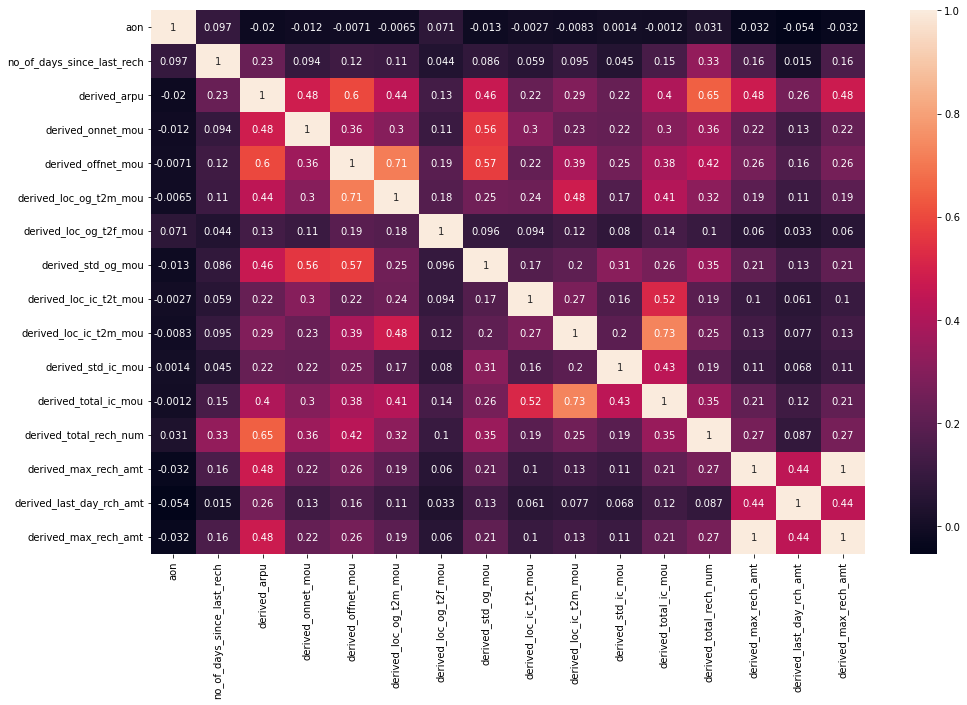

In [157]:
cols = top_15.append(telecom.columns[-2:-1]) # adding churned column

plt.figure(figsize = (16,10))
sns.heatmap(telecom[cols].corr(),annot = True)
plt.show()

## Using XGBoost for Feature Importance

In [172]:
xgb_best = xgb.XGBClassifier(learning_rate=0.2, max_depth = 10, n_estimators = 500, n_jobs=-1)

X_tr_smote_df = pd.DataFrame(data=X_train_smote, columns= X.columns)

xgb_best.fit(X_tr_smote_df[top_15], y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [173]:
feature_importance_df = pd.DataFrame({
    "Feature Name": X_tr_smote_df[top_15].columns,
    "Importance": xgb_best.feature_importances_})

feature_importance_df.sort_values(by="Importance", ascending=False)

,Feature Name,Importance
9,derived_loc_ic_t2m_mou,0.332742
7,derived_std_og_mou,0.101757
1,no_of_days_since_last_rech,0.099460
6,derived_loc_og_t2f_mou,0.082523
8,derived_loc_ic_t2t_mou,0.061413
14,derived_last_day_rch_amt,0.053651
13,derived_max_rech_amt,0.037712
5,derived_loc_og_t2m_mou,0.033395
2,derived_arpu,0.032701
10,derived_std_ic_mou,0.032151


In [174]:
print("Top 15 features are : ", feature_importance_df['Feature Name'].values)

Top 15 features are :  ['aon' 'no_of_days_since_last_rech' 'derived_arpu' 'derived_onnet_mou'
 'derived_offnet_mou' 'derived_loc_og_t2m_mou' 'derived_loc_og_t2f_mou'
 'derived_std_og_mou' 'derived_loc_ic_t2t_mou' 'derived_loc_ic_t2m_mou'
 'derived_std_ic_mou' 'derived_total_ic_mou' 'derived_total_rech_num'
 'derived_max_rech_amt' 'derived_last_day_rch_amt']


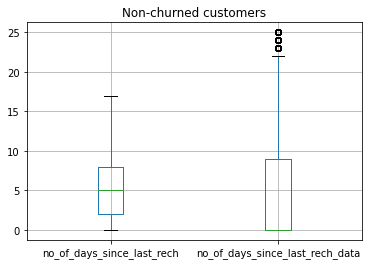

In [161]:
telecom[telecom['churn_probability'] == 0][['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].boxplot()
plt.title("Non-churned customers")
plt.show()

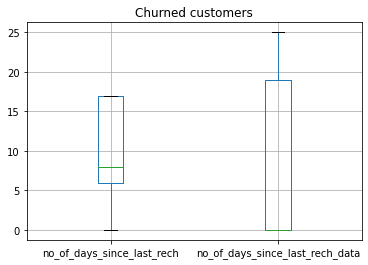

In [162]:
telecom[telecom['churn_probability'] == 1][['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].boxplot()
plt.title("Churned customers")
plt.show()

In [163]:
print("75 percentile of no_of_days_since_last_rech for Churned customers")
print(telecom[telecom['churn_probability'] == 1]['no_of_days_since_last_rech'].quantile(.75))

print("75 percentile of no_of_days_since_last_rech for non-Churned customers")
print(telecom[telecom['churn_probability'] == 0]['no_of_days_since_last_rech'].quantile(.75))

print("50 percentile of no_of_days_since_last_rech_data for Churned customers")
print(telecom[telecom['churn_probability'] == 1]['no_of_days_since_last_rech_data'].quantile(.50))

print("50 percentile of no_of_days_since_last_rech_data for non-Churned customers")
print(telecom[telecom['churn_probability'] == 0]['no_of_days_since_last_rech_data'].quantile(.50))

75 percentile of no_of_days_since_last_rech for Churned customers
17.0
75 percentile of no_of_days_since_last_rech for non-Churned customers
8.0
50 percentile of no_of_days_since_last_rech_data for Churned customers
0.0
50 percentile of no_of_days_since_last_rech_data for non-Churned customers
0.0


In [164]:
print("Average derived minute of usage for non-churned customers")
print(telecom[telecom['churn_probability'] == 0][['derived_loc_og_t2f_mou', 'derived_loc_ic_t2t_mou', 'derived_loc_ic_t2m_mou']].mean())

print("Average derived minute of usage for Churned customers")
print(telecom[telecom['churn_probability'] == 1][['derived_loc_og_t2f_mou', 'derived_loc_ic_t2t_mou', 'derived_loc_ic_t2m_mou']].mean())

Average derived minute of usage for non-churned customers
derived_loc_og_t2f_mou    0.159705
derived_loc_ic_t2t_mou    0.520582
derived_loc_ic_t2m_mou   -0.939053
dtype: float64
Average derived minute of usage for Churned customers
derived_loc_og_t2f_mou     0.103578
derived_loc_ic_t2t_mou     3.997841
derived_loc_ic_t2m_mou    11.081838
dtype: float64


- For Churned customer average 'derived_loc_ic_t2m_mou' = 11 means, people whose minute of usage of incoming calls from other mobile dropped by 11 units in action phase are likely to churn.
- The value of derived_loc_ic_t2t_mou can be interpreted similarly.
- For churned and non-churned derived_loc_og_t2f_mou average value is similar.

In [165]:
print("Average derived last day recharge for non-churned customers")
print(telecom[telecom['churn_probability'] == 0][['derived_last_day_rch_amt']].mean())

print("Average derived last day recharge for Churned customers")
print(telecom[telecom['churn_probability'] == 1][['derived_last_day_rch_amt']].mean())

Average derived last day recharge for non-churned customers
derived_last_day_rch_amt   -1.113748
dtype: float64
Average derived last day recharge for Churned customers
derived_last_day_rch_amt    25.257431
dtype: float64


- 'derived_last_day_rch_amt' is obtained by subtracting last recharge amount of action phase from average last recharge amount of good phase. Higher the positive value of 'derived_last_day_rch_amt', greater the drop in recharge in action phase.
- If there is significant drop in last recharge in action phase than good phase, customers are more likely to churn. 

In [166]:
print("Average derived revenue per user for non-churned")
print(telecom[telecom['churn_probability'] == 0][['derived_arpu']].mean())

print("Average derived revenue per user for Churned")
print(telecom[telecom['churn_probability'] == 1][['derived_arpu']].mean())

Average derived revenue per user for non-churned
derived_arpu   -9.223769
dtype: float64
Average derived revenue per user for Churned
derived_arpu    116.799717
dtype: float64


- 'derived_arpu' is obtained by subtracting arpu of action phase from average arpu of good phase. Higher the positive value of 'derived_arpu', greater the drop in revenue per user in action phase.
- If there is significant drop in revenue per use in action phase, customers are more likely to churn. 

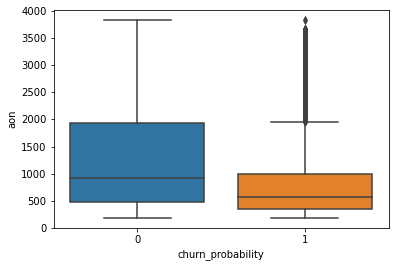

In [167]:
sns.boxplot(x=telecom['churn_probability'], y=telecom['aon'])
plt.show()

In [168]:
print("Average age of network for non-churned customers")
print(telecom[telecom['churn_probability'] == 0][['aon']].mean())

print("Average age of network for Churned customers")
print(telecom[telecom['churn_probability'] == 1][['aon']].mean())

Average age of network for non-churned customers
aon    1263.720426
dtype: float64
Average age of network for Churned customers
aon    838.3485
dtype: float64


Relatively new customers are more likely to churn.

In [169]:
print("Non-churned Customers")
print(telecom[telecom["churn_probability"] == 0]['derived_total_rech_num'].value_counts(normalize=True))

print("Churned Customers")
print(telecom[telecom["churn_probability"] == 1]['derived_total_rech_num'].value_counts(normalize=True))

Non-churned Customers
 1.0    0.069814
 0.5    0.067842
 1.5    0.064708
 0.0    0.064104
-7.5    0.060859
 2.0    0.059379
-0.5    0.058489
 2.5    0.051315
-1.0    0.051267
-1.5    0.043409
 3.0    0.039878
-2.0    0.036315
 3.5    0.032799
 8.5    0.032688
-2.5    0.031177
 4.0    0.025180
-3.0    0.024687
-3.5    0.021315
 4.5    0.020838
-4.0    0.016718
 5.0    0.016018
-4.5    0.015286
-5.0    0.013171
 5.5    0.012868
-5.5    0.010546
 6.0    0.010212
-6.0    0.009274
-6.5    0.008621
 6.5    0.007444
-7.0    0.006713
 7.0    0.006633
 7.5    0.005838
 8.0    0.004597
Name: derived_total_rech_num, dtype: float64
Churned Customers
 8.5    0.142316
 0.5    0.062535
 1.0    0.059310
 1.5    0.055945
 2.0    0.055665
 2.5    0.053842
 0.0    0.049215
 3.0    0.046270
 3.5    0.045709
 4.0    0.042344
 4.5    0.038839
-0.5    0.032950
-1.0    0.031969
 5.0    0.031688
 5.5    0.029585
 6.0    0.024958
 6.5    0.024397
-1.5    0.023836
 7.0    0.018648
-2.0    0.018508
 7.5    0.0182

- Negative value of 'derived_total_rech_num' means increase of total recharge number in action phase. For retained customers, there are a lot a customers for whom total number of recharge increased.

- Positive value of 'derived_total_rech_num' means decrease in total recharge number in action phase. About 14 % of the churned customers' total number of recharge dropped by 8 in action phase. 

- This derived feature gives an comparative measure between total number of recharges in good phase and action phase, hence fraction is acceptable.

In [170]:
telecom[telecom['churn_probability'] == 0][['derived_max_rech_amt']].mean()

derived_max_rech_amt   -6.792252
dtype: float64

In [171]:
telecom[telecom['churn_probability'] == 1][['derived_max_rech_amt']].mean()

derived_max_rech_amt    32.402412
dtype: float64

Positive values of 'derived_max_rech_amt' indicate drop in maximum recharge amount in action phase, which in turn indicates high probability of Customer churn.

# Recommendation for Reducing Customer Churn:

## Feature Related Recommendations:

1. Customers with 'no_of_days_since_last_rech' 17 or more are most likely churn. 
- **Company sales team may focus on customers who have not made a recharge in last 17 days or more and provide them with special talk-time offers to reduce churn.**

2. Customers with 'no_of_days_since_last_rech_data' 50 or more are most likely churn. 
- **Company sales team may focus on customers who have not made a recharge for mobile data in last 1.5 months or more and provide them with special data recharge offers to reduce churn.**

3. Customers with high positive values in 'derived_loc_ic_t2m_mou' and derived_loc_ic_t2t_mou are going to churn. 
- **Drop in incoming call usage can signify customer churn. Company needs to revise its plans and offer customers with suitable plans if incoming calls are charged. Incoming calls may reduce for poor network in customers' current location.**

4. Customers with high positive values in 'derived_last_day_rch_amt' are going to churn. 
- **Company sales team may focus on the customer whose derived_last_day_rch_amt >= 25. Drop in last recharge amount in action phase is indicator of churn.**

5. Customers with high positive values in 'derived_arpu' are going to churn. 
- **Company sales team may focus on the customer whose derived_arpu > 116. Drop in average revenue per user in action phase is important indicator of customer churn. Revenue is generated by recharges made by the customer, suitable offers can be given to the customer by checking other information such as drop in outgoing calls, drop in data recharge etc.**


6. Customers with aon (age of network) < 850 are more likely to churn than others. 
- **Customers using the telecom operator for more than 1000 days or 3 years are proven to be loyal customers (aon>1000). Churned customers have average aon less than 850, that means customers using the telecom operator for 2 years or less (850 days or less) might churn.**

7. Positive value of 'derived_total_rech_num'> 8 is a strong indicator of churn. About 14 % of the churned customers, total number of recharge dropped by 8 in action phase.
- **Sales team may provide some offer to customers with dropping number of recharge with suitable recharge options.**

8. Positive values of 'derived_max_rech_amt'  indicate drop in maximum recharge amount in action phase, which in turn indicates high probability of Customer churn
- **Sales team may provide some offers with less price to customers with dropping recharge amount.**

## Conclusion

### Predictor Model
Since reducing customer churns with attractive offers is less expensive than making new customers, sensitivity score is considered for the building the final predictor model. 

XGBoost trained with learning_rate=0.2, max_depth = 10, and n_estimators = 500 has accuracy score of 0.91 and sensitivity score of 0.60

- **The final model could predict 60% of the churned customers correctly out of all the churned customers. (sensitivity)**

- **Accuracy score 0.90 means 90% of the predictions made by the final model are correct out of all the predictions.**

### Interpretable Model
* The top 15 features selected by RFE and manual inspection of VIF and p-values are:
 
 'aon', 'no_of_days_since_last_rech', 'derived_arpu', 'derived_onnet_mou', 'derived_offnet_mou', 'derived_loc_og_t2m_mou', 'derived_loc_og_t2f_mou', 'derived_std_og_mou', 'derived_loc_ic_t2t_mou', 'derived_loc_ic_t2m_mou', 'derived_std_ic_mou', 'derived_total_ic_mou', 'derived_total_rech_num', 'derived_max_rech_amt', 'derived_last_day_rch_amt'

* Logistic Regression model is built with the above features.

XGBoost model is built with learning_rate=0.2, max_depth = 10, and n_estimators = 500 for feature impotance. 
- derived_loc_ic_t2m_mou -> 0.332742
- derived_std_og_mou -> 0.101757
- no_of_days_since_last_rech -> 0.099460
- derived_loc_og_t2f_mou -> 0.082523
- derived_loc_ic_t2t_mou -> 0.061413
- derived_last_day_rch_amt -> 0.053651
- derived_max_rech_amt -> 0.037712
- derived_loc_og_t2m_mou -> 0.033395
- derived_arpu -> 0.032701
- derived_std_ic_mou -> 0.032151
- derived_onnet_mou -> 0.028828
- derived_total_rech_num -> 0.028516
- derived_offnet_mou -> 0.025237
- aon -> 0.025005
- derived_total_ic_mou -> 0.024907